# Machine Learning Models for Stock Market Prediction

<i>Module Code: CS3IP16  
Report Title: A comparison of machine learning models in predicting stock market prices  
Student Number: 27816792  
Date of Completion: 20/04/2023</i>

## Table of Contents 
1. [Importing Libraries](#import)
2. [The Dataframe](#display)
4. [Exploratory Data Analysis](#eda)
    2. [Data Pre-processing](#prepro)  
        1. [Data Reduction](#sample)  
        2. [Data Cleaning](#clean)
    3. [New Column](#new)
    4. [Statistical Calculations](#stats)
    5. [Data Visualisation](#visual)
5. [Machine Learning Models](#mlm)
    1. [Linear Regression](#lr)
    2. [Random Forest](#rforest)
    2. [ARIMA](#arima)
    3. [Long-Short Term Memory](#lstm)
    4. [Convolutional Neural Network](#cnn)
    5. [Joint ML Evaluation](#eval)
    1. [Decision Tree Classifier](#dtc)

## Importing Libraries <a name='import'></a>

In [1]:
# dataframe manipulation
import pandas as pd

# mathematical calculations
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sb

# exploratory data analysis
import fyp_eda

# machine learning models
import fyp_dtc
import fyp_lr
import fyp_rForest
import fyp_arima
import fyp_lstm
import fyp_cnn

## DataFrames <a name='display'></a>

Column | Description
-|:-
Date | date (yyyy-MM-DD)
Open | initial price; price when market is open
High | highest price of the day
Low | lowest price of the day
Close | closing price; price when market is closed
Adj Close | adjusted closing price; closing price after factoring corporate actions
Volume | Number of shares traded in the date specified

In [2]:
# set dataframe to read target csv file
# apple stock
apple_df = pd.read_csv(r'C:\Users\asals\OneDrive\Documents\FYP\datasets\AAPL.csv')
apple_df.sample(5)

Date        Open        High         Low       Close   Adj Close  \
3034  1992-12-14    2.053571    2.062500    2.026786    2.044643    1.709274   
9521  2018-09-17  222.149994  222.949997  217.270004  217.880005  213.401993   
6214  2005-07-28    6.264286    6.285714    6.185714    6.257143    5.431456   
6683  2007-06-11   18.000000   18.021429   17.077143   17.170000   14.904263   
8893  2016-03-21  105.930000  107.650002  105.139999  105.910004   99.271408   

         Volume  
3034   27627600  
9521   37195100  
6214   62827800  
6683  468564600  
8893   35502700

In [3]:
# alphabet stock
google_df = pd.read_csv(r'C:\Users\asals\OneDrive\Documents\FYP\datasets\GOOGL.csv')
google_df.sample(5)

Date         Open         High          Low        Close  \
3463  2018-05-22  1089.800049  1091.800049  1072.260010  1075.310059   
275   2005-09-21   154.359360   157.037033   153.133133   156.106110   
404   2006-03-28   186.041046   189.119125   185.770767   188.788788   
3210  2017-05-19   952.820007   959.559998   952.000000   954.650024   
1323  2009-11-18   288.613617   289.679688   286.321320   288.613617   

        Adj Close    Volume  
3463  1075.310059   1111300  
275    156.106110  20219100  
404    188.788788  17873700  
3210   954.650024   1360300  
1323   288.613617   3096100

In [4]:
# microsoft stock
msft_df = pd.read_csv(r'C:\Users\asals\OneDrive\Documents\FYP\datasets\MSFT.csv')
msft_df.sample(5)

Date       Open       High        Low      Close  Adj Close  \
1800  1993-04-26   2.546875   2.578125   2.492188   2.511719   1.611532   
281   1987-04-23   0.342014   0.345486   0.336806   0.342014   0.219438   
14    1986-04-03   0.096354   0.098958   0.096354   0.096354   0.061821   
4733  2004-12-14  27.049999  27.330000  27.040001  27.230000  19.702192   
5208  2006-11-01  28.780001  28.990000  28.700001  28.809999  21.332253   

         Volume  
1800   65376000  
281    48326400  
14     23040000  
4733  127843200  
5208   75895900

## Exploratory Data Analysis <a name='eda'></a>

In [5]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [6]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3932 non-null   object 
 1   Open       3932 non-null   float64
 2   High       3932 non-null   float64
 3   Low        3932 non-null   float64
 4   Close      3932 non-null   float64
 5   Adj Close  3932 non-null   float64
 6   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 215.2+ KB


In [7]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8584 non-null   object 
 1   Open       8584 non-null   float64
 2   High       8584 non-null   float64
 3   Low        8584 non-null   float64
 4   Close      8584 non-null   float64
 5   Adj Close  8584 non-null   float64
 6   Volume     8584 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 469.6+ KB


### Data Pre-processing <a name='prepro'></a>

#### Data Reduction <a name='sample'></a>

In [8]:
apple_df  = fyp_eda.reduct(apple_df)
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 7078 to 9593
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


In [9]:
google_df = fyp_eda.reduct(google_df)
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 1101 to 3616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


In [10]:
msft_df = fyp_eda.reduct(msft_df)
msft_df.info(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 5753 to 8268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


#### Data Cleaning <a name='clean'></a>

In [11]:
# clean df from unwanted columns, duplicate & missing values
apple_df = fyp_eda.cleaning(apple_df)

# print sample of df after cleaning
apple_df.sample(5)

Date        Open        High         Low       Close
9044 2016-10-24  117.099998  117.739998  117.000000  117.650002
7234 2009-08-17   23.364286   23.370001   22.774286   22.798571
7892 2012-03-27   86.597145   88.040001   86.580002   87.782860
7820 2011-12-12   55.954285   56.271427   55.635715   55.977142
7652 2011-04-13   47.860001   48.020000   47.502857   48.018570

In [12]:
# clean df from unwanted columns, duplicate & missing values
google_df = fyp_eda.cleaning(google_df)

# print sample of df after cleaning
google_df.sample(5)

Date         Open         High          Low        Close
3222 2017-06-07   999.090027  1003.909973   995.869995  1001.500000
2857 2015-12-23   770.690002   771.900024   757.650024   768.510010
3371 2018-01-09  1118.439941  1118.439941  1108.199951  1112.790039
1466 2010-06-16   248.333328   252.252258   248.303299   250.885880
1919 2012-04-02   320.705719   324.074066   317.737732   323.783783

In [13]:
# clean df from unwanted columns, duplicate & missing values
msft_df = fyp_eda.cleaning(msft_df)

# print sample of df after cleaning
msft_df.sample(5)

Date       Open       High        Low      Close
6789 2013-02-14  27.920000  28.059999  27.870001  28.040001
7143 2014-07-14  42.220001  42.450001  42.040001  42.139999
6641 2012-07-12  29.150000  29.180000  28.540001  28.629999
7550 2016-02-24  50.689999  51.500000  50.200001  51.360001
6253 2010-12-28  27.969999  28.170000  27.959999  28.010000

### New Column <a name='new'></a>

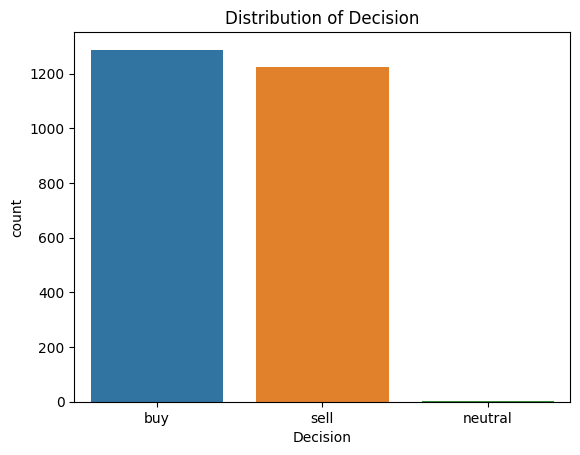

Date        Open        High         Low       Close Decision
8315 2013-12-02   79.714287   80.618568   78.688568   78.747147     sell
8606 2015-01-29  116.320000  119.190002  115.559998  118.900002      buy
7562 2010-12-03   45.287144   45.521427   45.191429   45.348572      buy
7117 2009-03-02   12.588572   13.028571   12.524285   12.562857     sell
7609 2011-02-10   51.055714   51.428570   49.714287   50.648571     sell

In [14]:
# add decision column for classification
# implement new column (decision) on df
apple_df['Decision'] = apple_df.apply(lambda row: fyp_eda.decision(row['Open'], row['Close']), axis=1)

# plot distribution of unique values of decision
sb.countplot(x = apple_df['Decision'])
plt.title('Distribution of Decision')
plt.show()

# print sample of df after new column addition
apple_df.sample(5)

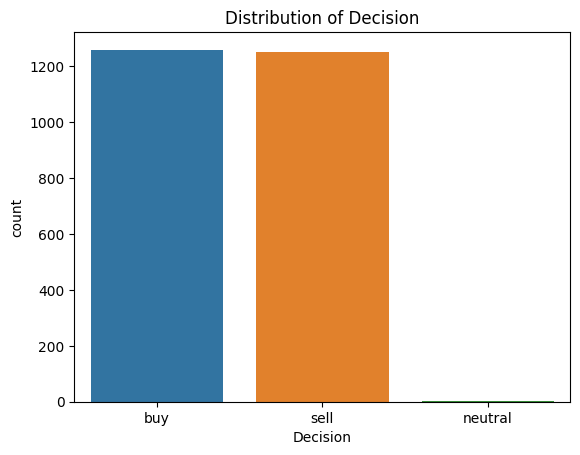

Date         Open         High          Low        Close Decision
3601 2018-12-07  1072.229980  1085.030029  1039.369995  1046.579956     sell
1278 2009-09-16   240.140137   244.929932   239.479477   244.389389      buy
3325 2017-11-01  1036.319946  1047.859985  1034.000000  1042.599976      buy
3505 2018-07-23  1195.660034  1215.099976  1192.010010  1211.000000      buy
3611 2018-12-21  1032.040039  1037.670044   981.190002   991.250000     sell

In [15]:
# add decision column for classification
# implement new column (decision) on df
google_df['Decision'] = google_df.apply(lambda row: fyp_eda.decision(row['Open'], row['Close']), axis=1)

# plot distribution of unique values of decision
sb.countplot(x = google_df['Decision'])
plt.title('Distribution of Decision')
plt.show()

# print sample of df after new column addition
google_df.sample(5)

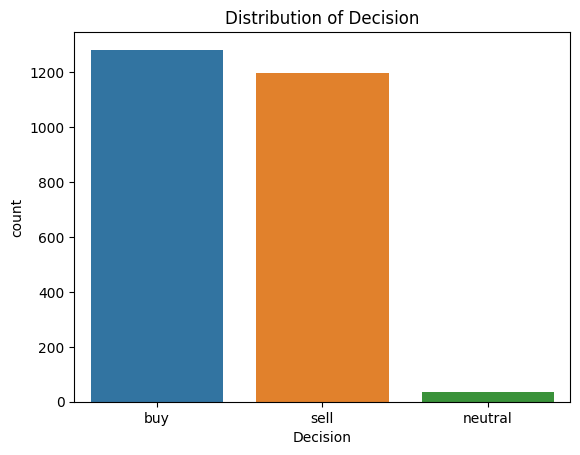

Date       Open       High        Low      Close Decision
7008 2013-12-27  37.580002  37.619999  37.169998  37.290001     sell
7317 2015-03-23  42.880001  43.130001  42.779999  42.860001     sell
7749 2016-12-06  60.430000  60.459999  59.799999  59.950001     sell
6551 2012-03-05  32.009998  32.049999  31.620001  31.799999     sell
7388 2015-07-02  44.480000  44.750000  44.060001  44.400002     sell

In [16]:
# add decision column for classification
# implement new column (decision) on df
msft_df['Decision'] = msft_df.apply(lambda row: fyp_eda.decision(row['Open'], row['Close']), axis=1)

# plot distribution of unique values of decision
sb.countplot(x = msft_df['Decision'])
plt.title('Distribution of Decision')
plt.show()

# print sample of df after new column addition
msft_df.sample(5)

### Statistical Calculations <a name='stats'></a>

In [17]:
# statistical calculations of numerical columns 
# rounded to 2 decimal places
round(apple_df.describe(), 2)

Open     High      Low    Close
count  2516.00  2516.00  2516.00  2516.00
mean     91.60    92.41    90.73    91.59
std      50.27    50.69    49.86    50.27
min      11.34    11.71    11.17    11.17
25%      51.03    51.42    50.56    50.96
50%      85.79    86.69    84.98    86.11
75%     118.92   119.88   118.21   119.15
max     230.78   233.47   229.78   232.07

In [18]:
# statistical calculations of numerical columns 
# rounded to 2 decimal places
round(google_df.describe(), 2)

Open     High      Low    Close
count  2516.00  2516.00  2516.00  2516.00
mean    554.97   559.66   549.82   554.84
std     296.36   298.91   293.52   296.25
min     144.32   149.90   141.52   141.52
25%     295.26   297.05   292.10   295.12
50%     523.83   530.53   518.29   522.97
75%     770.34   777.84   764.17   770.07
max    1289.12  1291.44  1263.00  1285.50

In [19]:
# statistical calculations of numerical columns 
# rounded to 2 decimal places
round(msft_df.describe(), 2)

Open     High      Low    Close
count  2516.00  2516.00  2516.00  2516.00
mean     45.55    45.95    45.14    45.56
std      23.95    24.14    23.70    23.93
min      15.20    15.62    14.87    15.15
25%      27.64    27.91    27.33    27.63
50%      37.23    37.54    36.90    37.21
75%      55.57    55.98    55.10    55.68
max     115.42   116.18   114.93   115.61

### Data Visualisation <a name='visual'></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 7078 to 9593
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2516 non-null   datetime64[ns]
 1   Open      2516 non-null   float64       
 2   High      2516 non-null   float64       
 3   Low       2516 non-null   float64       
 4   Close     2516 non-null   float64       
 5   Decision  2516 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.6+ KB




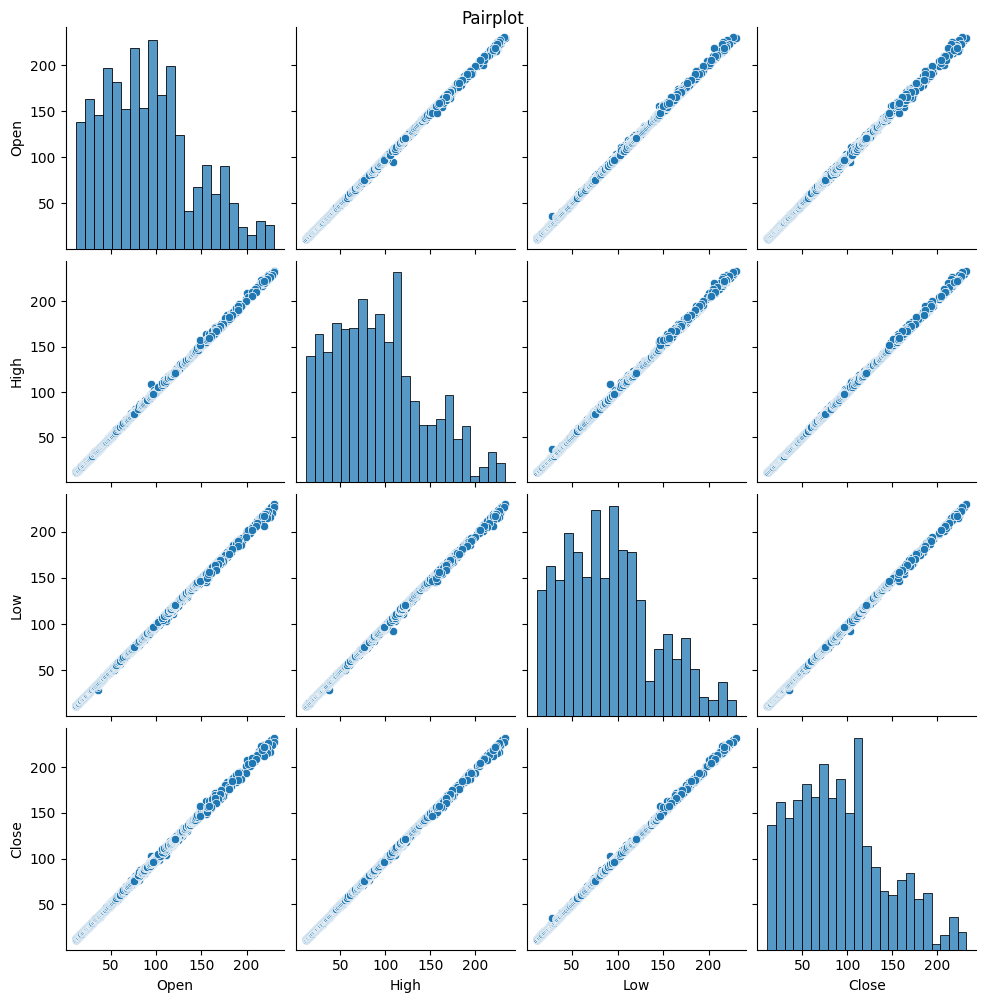



Correlation Table
           Open      High       Low     Close
Open   1.000000  0.999859  0.999809  0.999666
High   0.999859  1.000000  0.999770  0.999838
Low    0.999809  0.999770  1.000000  0.999848
Close  0.999666  0.999838  0.999848  1.000000




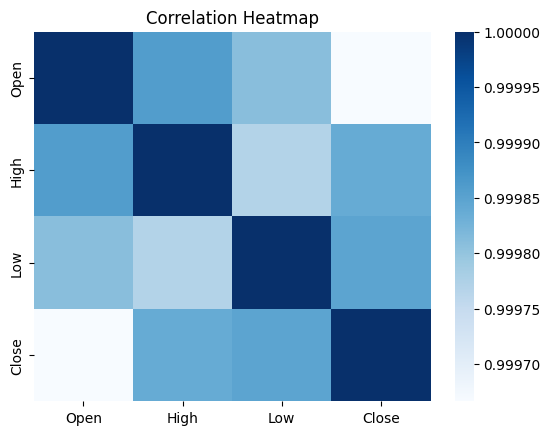

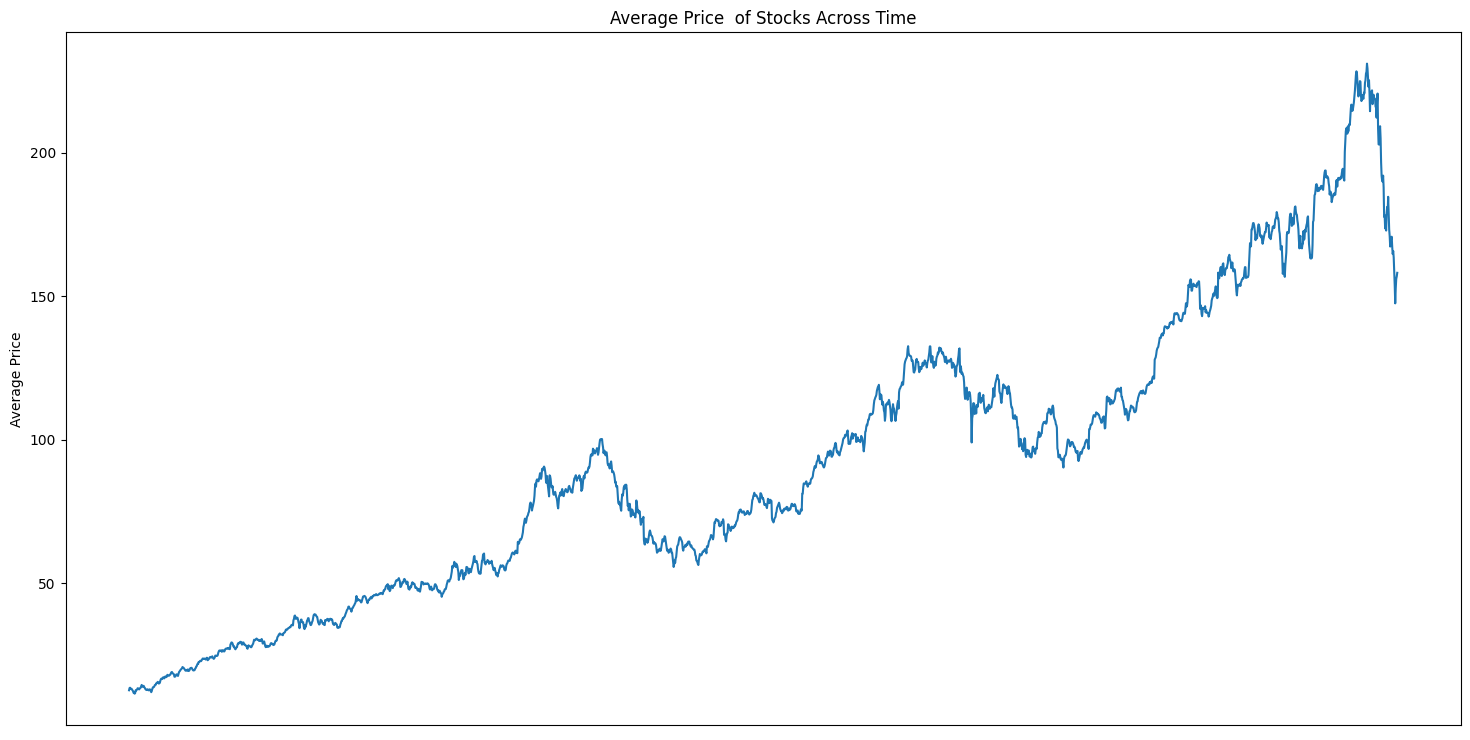

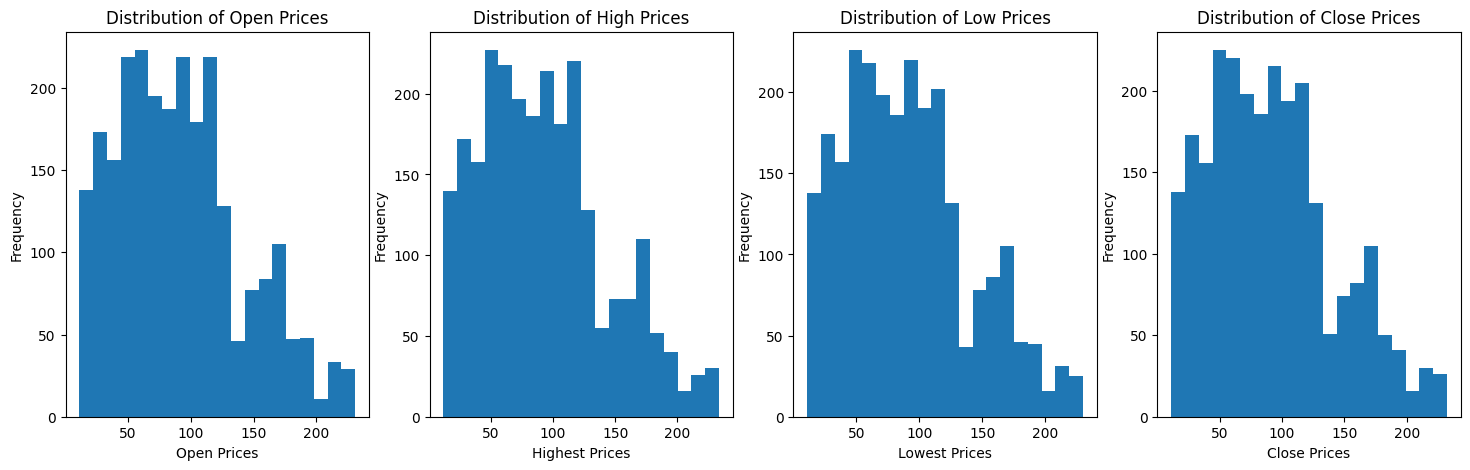



The Mean Value of Returns = 0.001134447308647387
The Standard Deviation of Returns = 0.016760304548303743
Skewness of Returns is: 3.942880664954826e-05
Kurtosis of Returns is: 3.5190445896009024




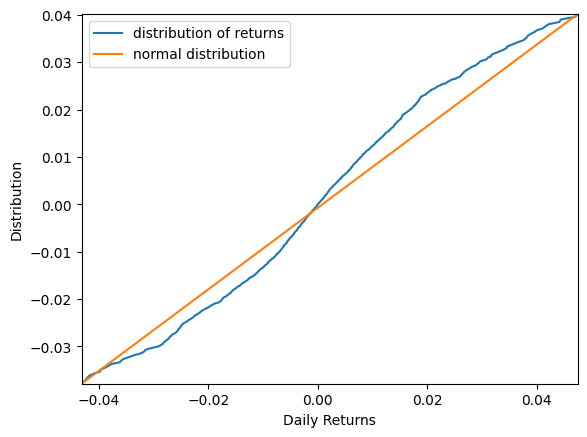

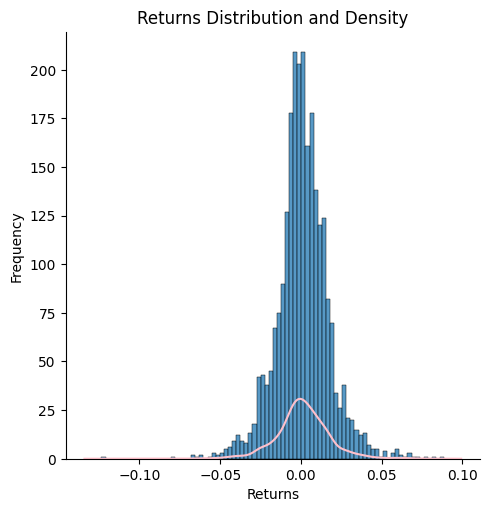

In [20]:
# apply eda function to df
fyp_eda.eda(apple_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 1101 to 3616
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2516 non-null   datetime64[ns]
 1   Open      2516 non-null   float64       
 2   High      2516 non-null   float64       
 3   Low       2516 non-null   float64       
 4   Close     2516 non-null   float64       
 5   Decision  2516 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.6+ KB




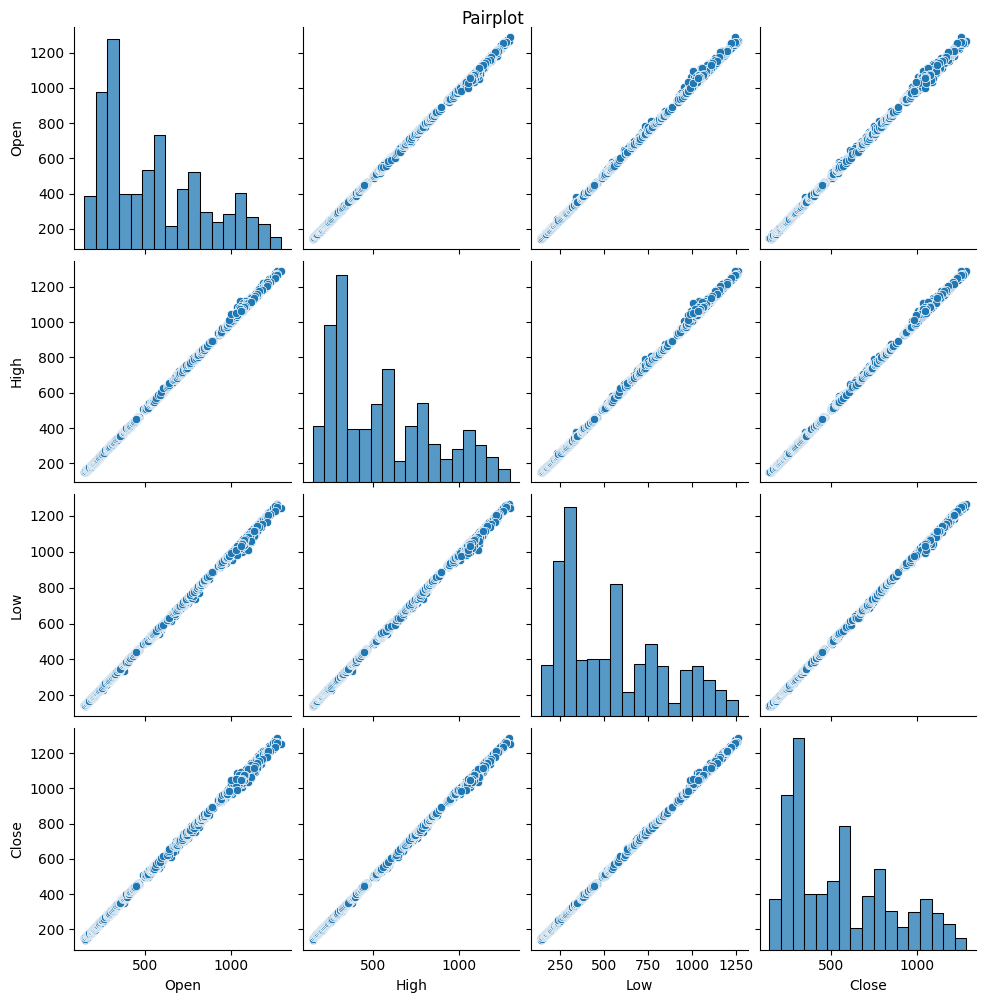



Correlation Table
           Open      High       Low     Close
Open   1.000000  0.999864  0.999792  0.999660
High   0.999864  1.000000  0.999767  0.999823
Low    0.999792  0.999767  1.000000  0.999864
Close  0.999660  0.999823  0.999864  1.000000




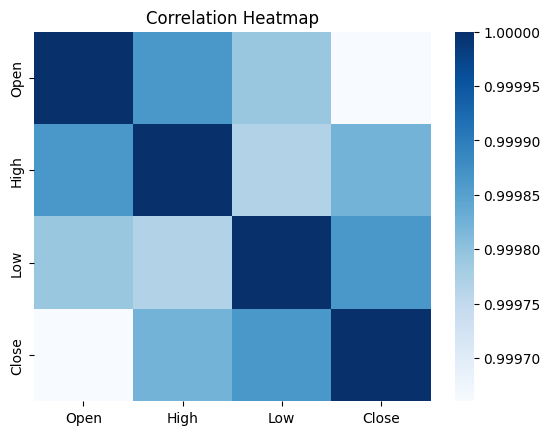

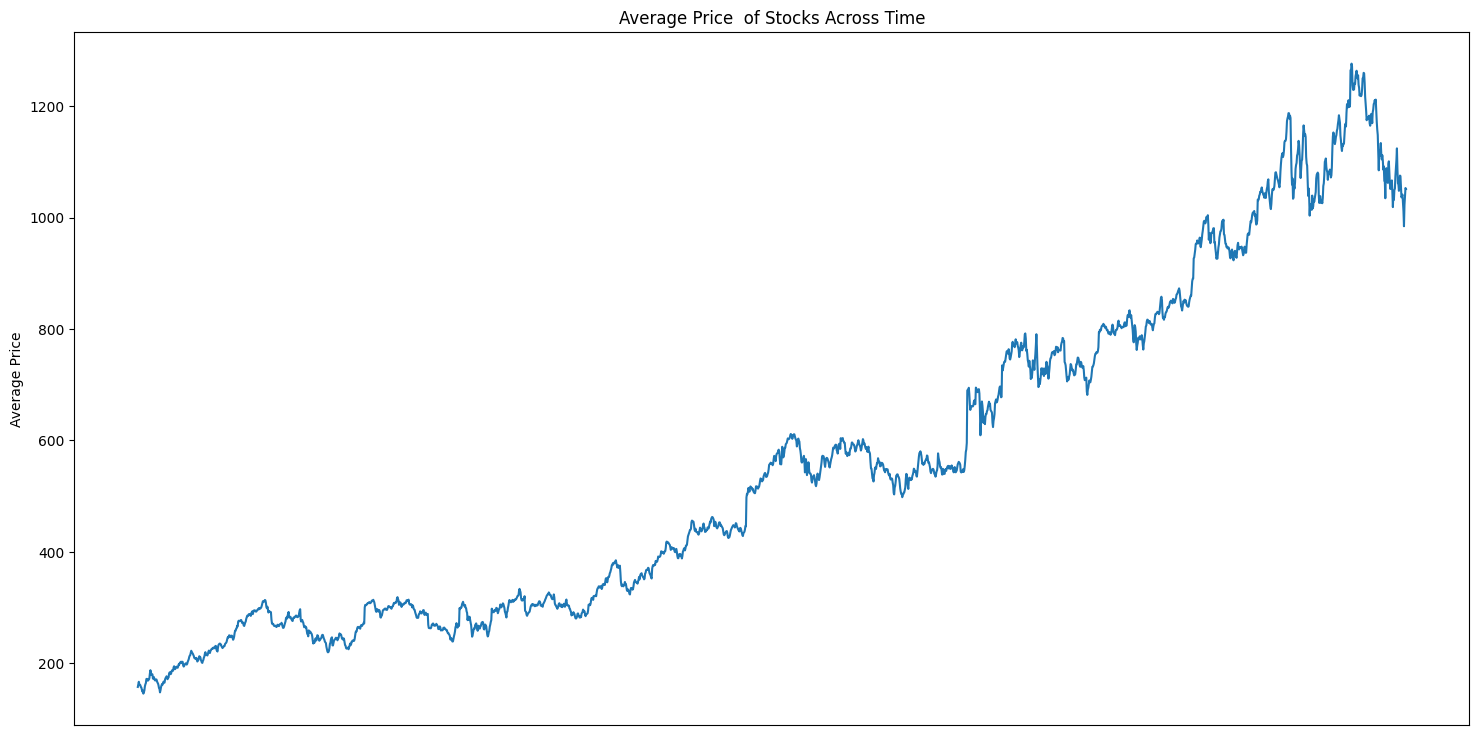

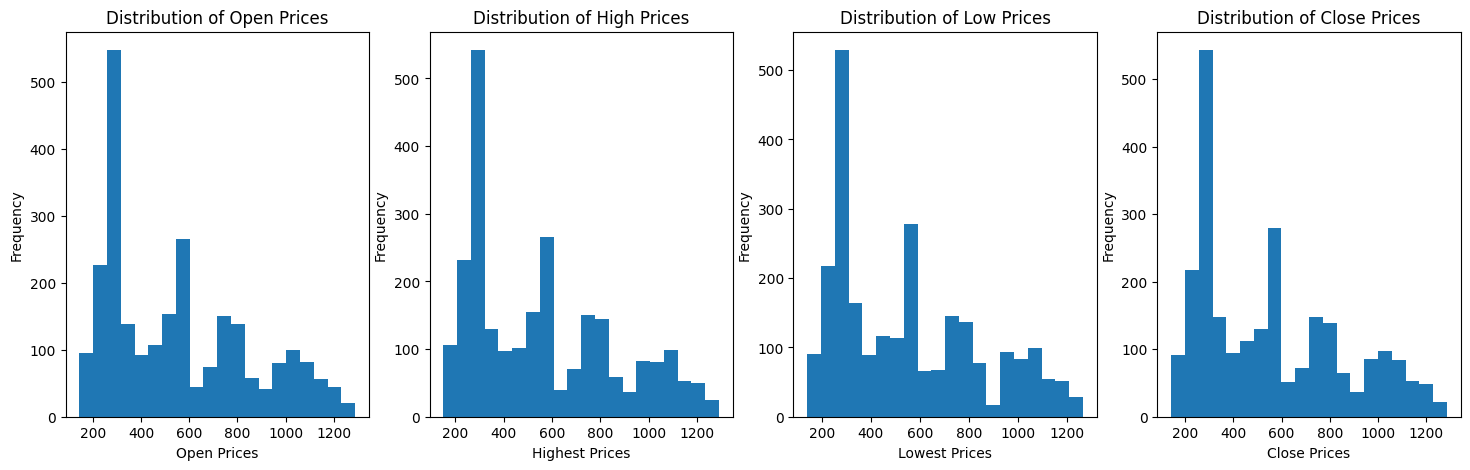



The Mean Value of Returns = 0.0008678557191190831
The Standard Deviation of Returns = 0.015770957401639266
Skewness of Returns is: 0.7588409456687321
Kurtosis of Returns is: 11.541755916950159




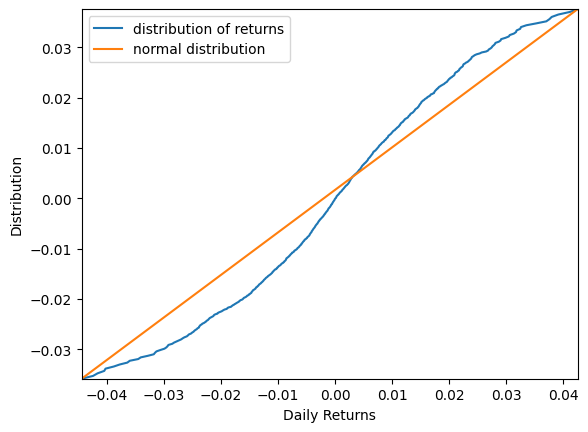

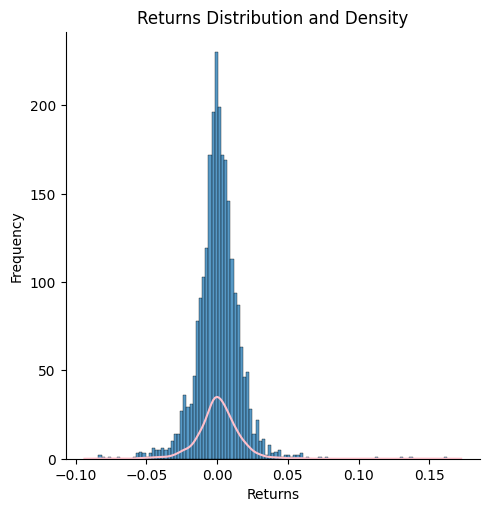

In [21]:
# apply eda function to df
fyp_eda.eda(google_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 5753 to 8268
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2516 non-null   datetime64[ns]
 1   Open      2516 non-null   float64       
 2   High      2516 non-null   float64       
 3   Low       2516 non-null   float64       
 4   Close     2516 non-null   float64       
 5   Decision  2516 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.6+ KB




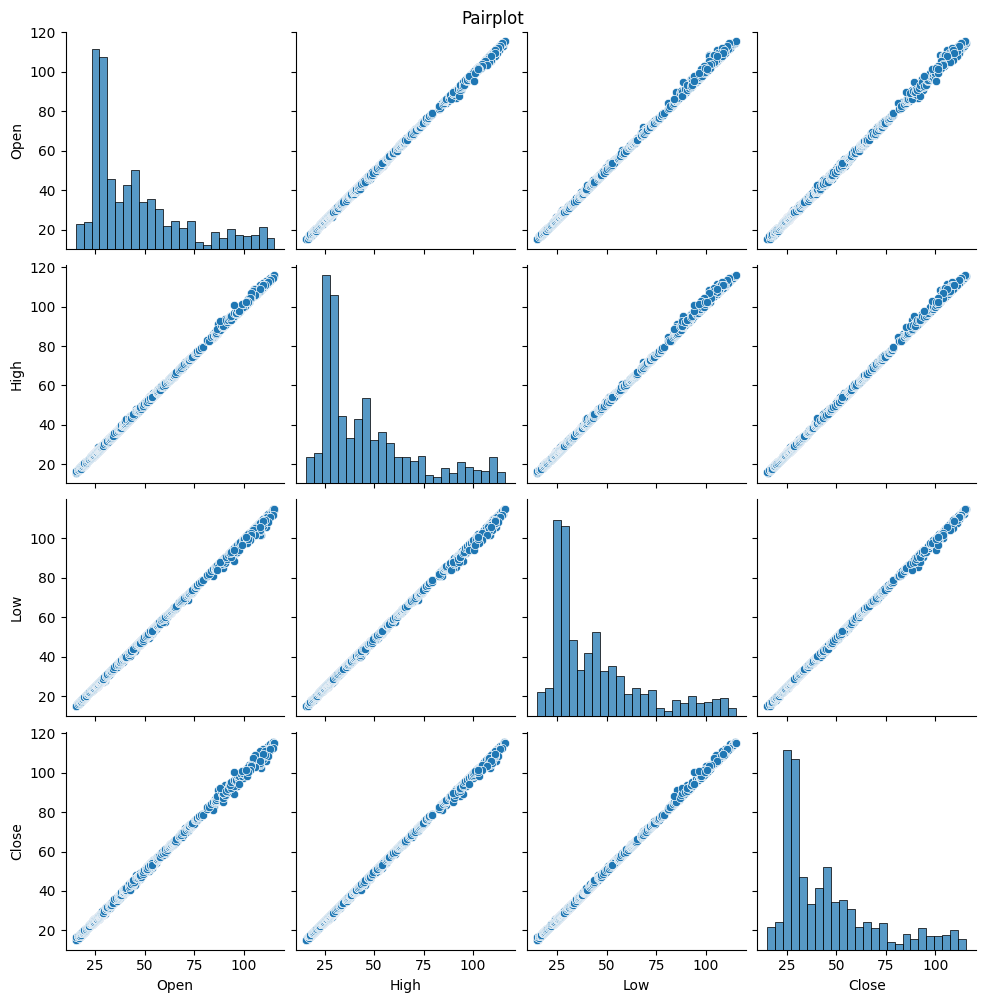



Correlation Table
           Open      High       Low     Close
Open   1.000000  0.999858  0.999785  0.999640
High   0.999858  1.000000  0.999741  0.999811
Low    0.999785  0.999741  1.000000  0.999844
Close  0.999640  0.999811  0.999844  1.000000




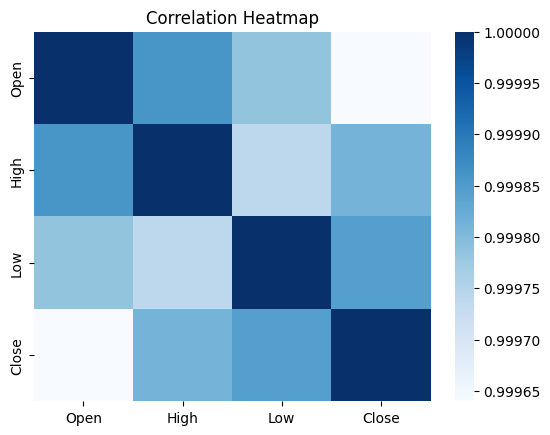

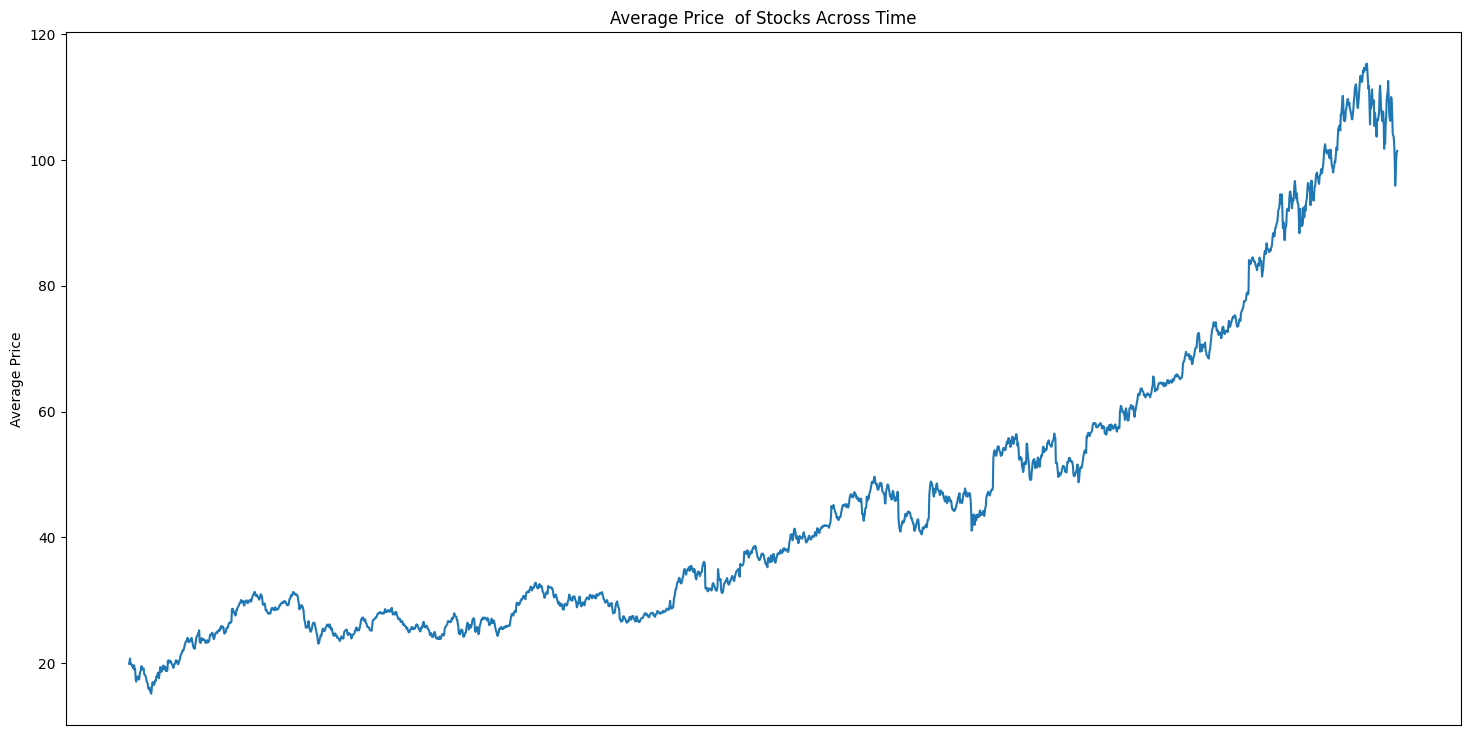

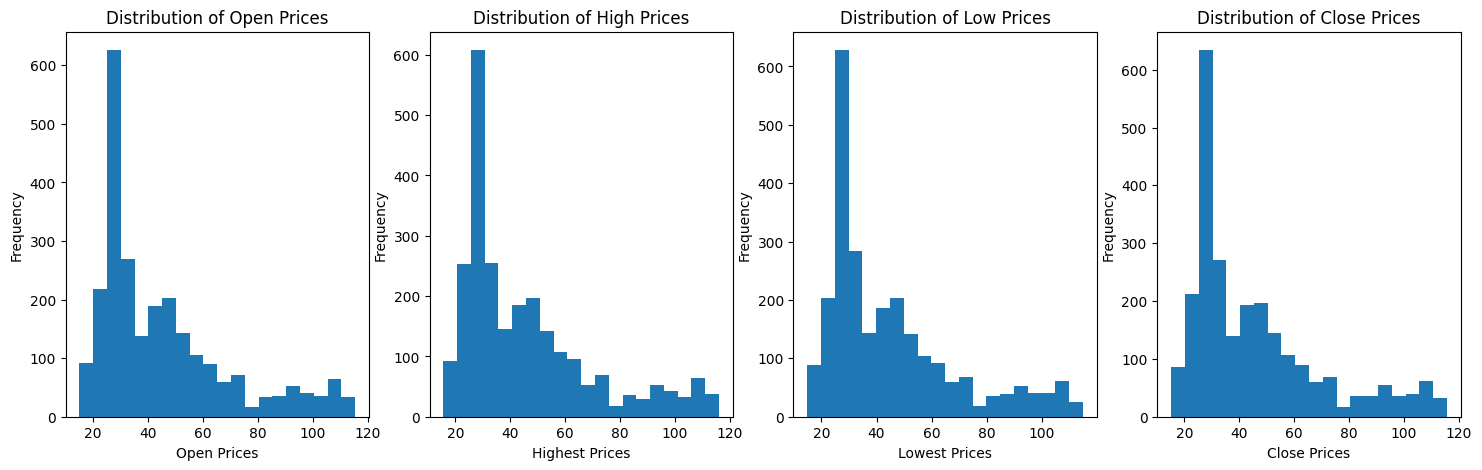



The Mean Value of Returns = 0.0007618179104864302
The Standard Deviation of Returns = 0.015620393270125108
Skewness of Returns is: 0.048425311195841814
Kurtosis of Returns is: 7.287147414218834




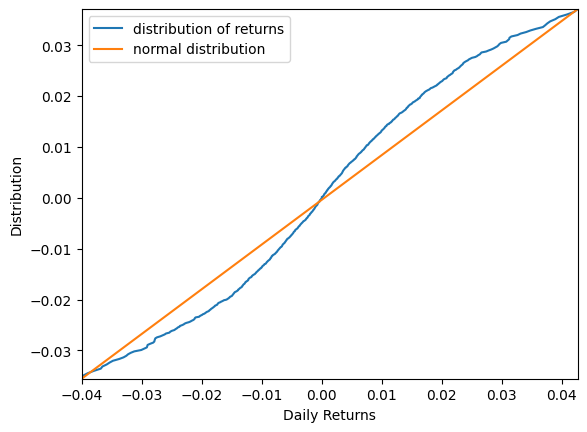

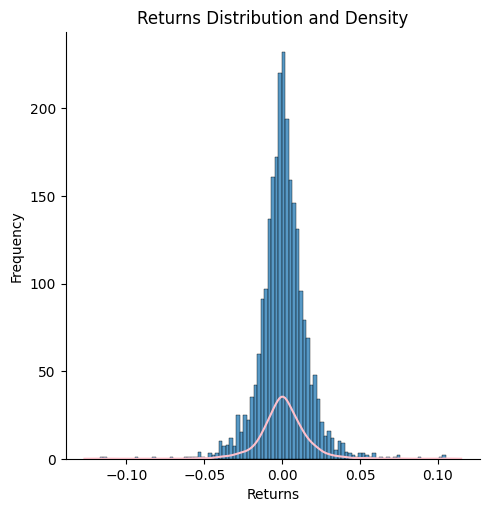

In [22]:
# apply eda function to df
fyp_eda.eda(msft_df)

## Machine Learning Models <a name='mlm'></a>

### Linear Regression <a name='lr'></a>

Time Taken:  0 seconds


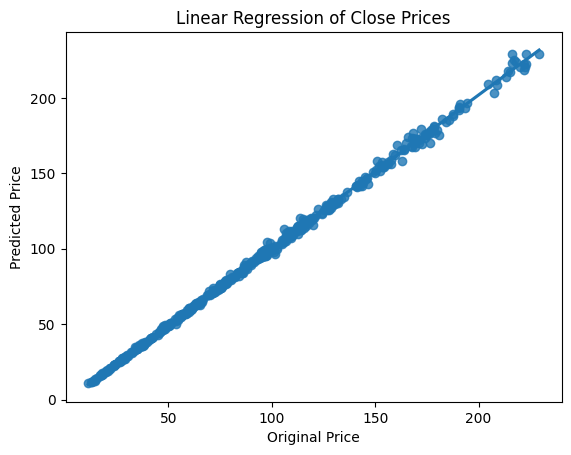

Model Evaluation
Mean Absolute Error: 1.3256280319938236
Root Mean Squared Error: 1.974079139326402
Mean Absolute Percentage Error: 1.7144389291696747%


In [23]:
fyp_lr.linear_reg(apple_df['Close'])

Time Taken:  0 seconds


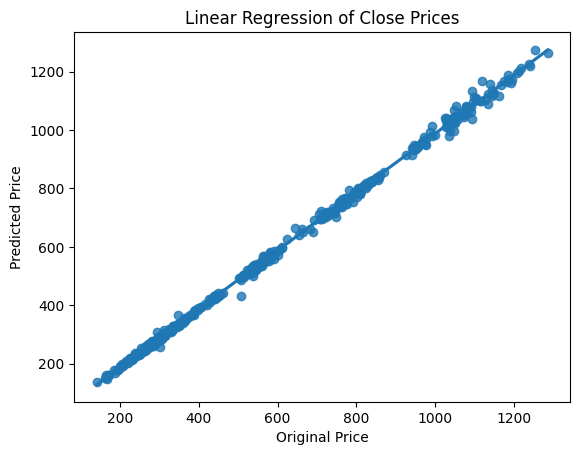

Model Evaluation
Mean Absolute Error: 13.891388345189222
Root Mean Squared Error: 16.153641618814888
Mean Absolute Percentage Error: 3.1149243788762466%


In [24]:
fyp_lr.linear_reg(google_df['Close'])

Time Taken:  0 seconds


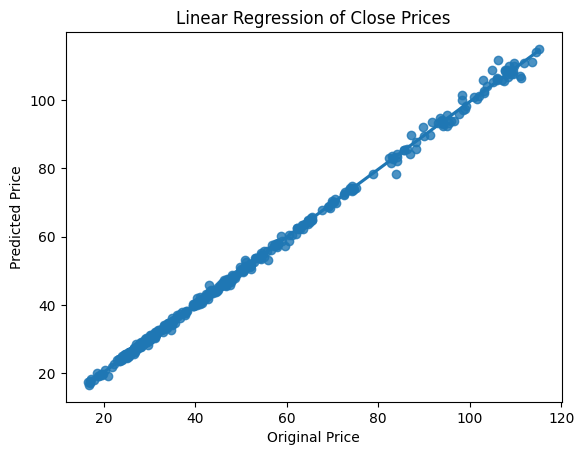

Model Evaluation
Mean Absolute Error: 0.55833034491272
Root Mean Squared Error: 0.880372764719131
Mean Absolute Percentage Error: 1.2317334574420398%


In [25]:
fyp_lr.linear_reg(msft_df['Close'])

### Random Forest <a name='rforest'></a>

Time Taken:  4 seconds


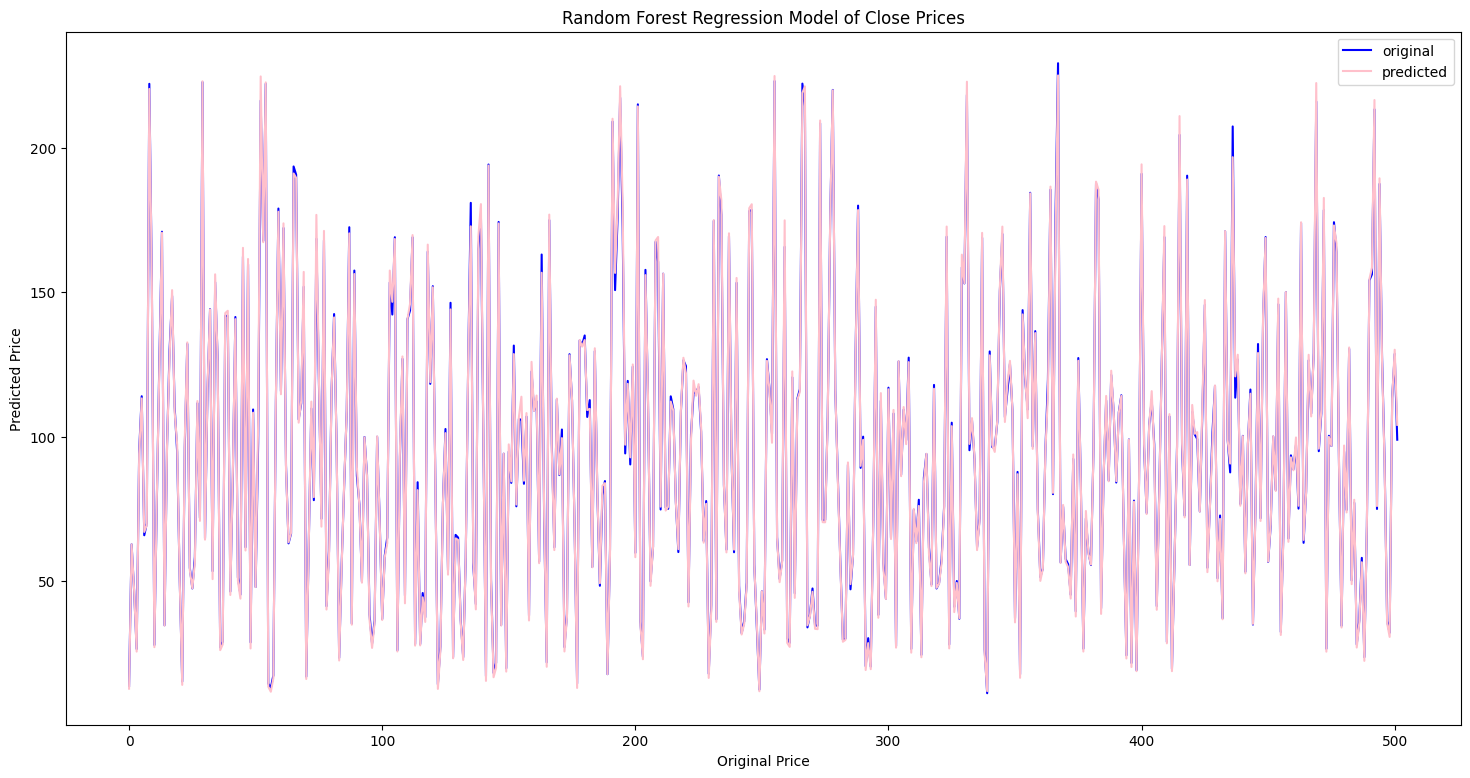

Model Evaluation
Mean Absolute Error: 1.3991398022424757
Root Mean Squared Error: 2.0572527773657865
Mean Absolute Percentage Error: 1.8528732779395989%


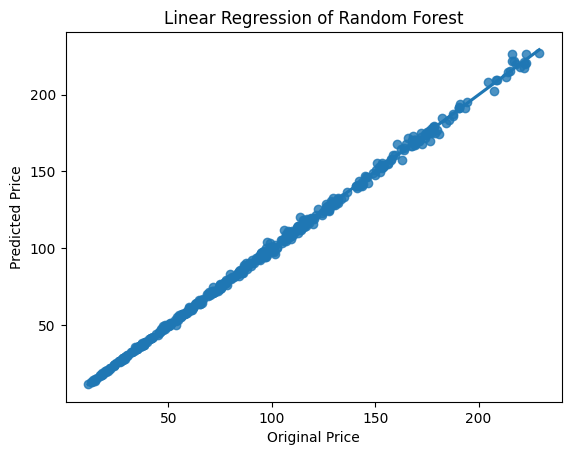

Model Evaluation
Mean Absolute Error: 1.3991398022424757
Root Mean Squared Error: 1.675306384081217
Mean Absolute Percentage Error: 1.2044325927223811%


In [26]:
fyp_rForest.rand_forest(apple_df['Close'])

Time Taken:  4 seconds


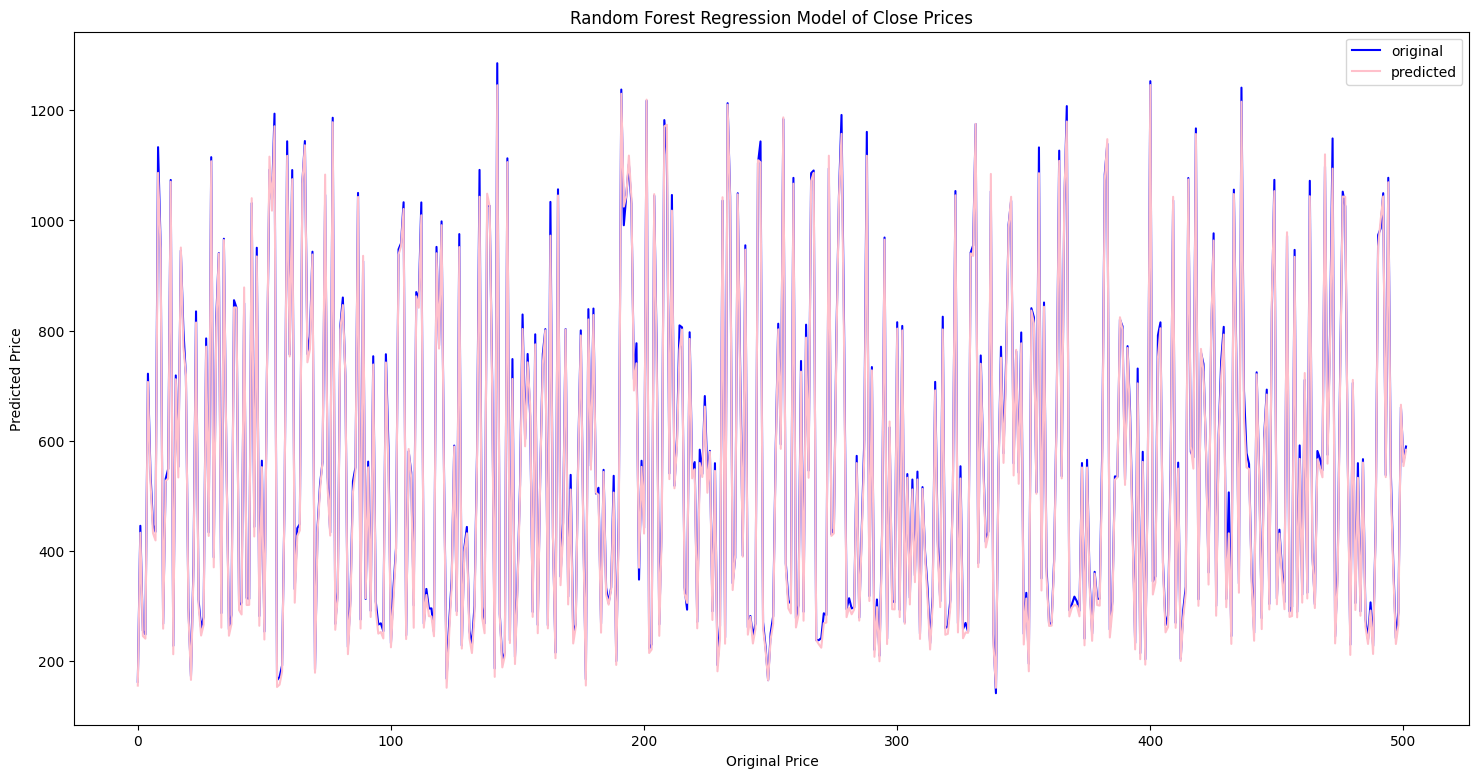

Model Evaluation
Mean Absolute Error: 13.508710956950003
Root Mean Squared Error: 16.413610271718237
Mean Absolute Percentage Error: 3.014757060842709%


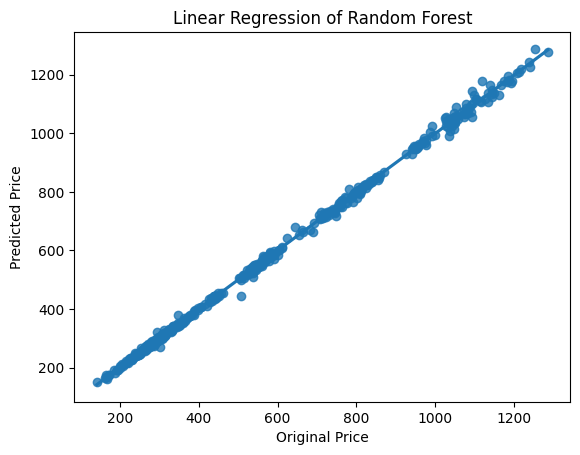

Model Evaluation
Mean Absolute Error: 13.508710956950003
Root Mean Squared Error: 10.24112875027852
Mean Absolute Percentage Error: 1.187032305951233%


In [27]:
fyp_rForest.rand_forest(google_df['Close'])

Time Taken:  4 seconds


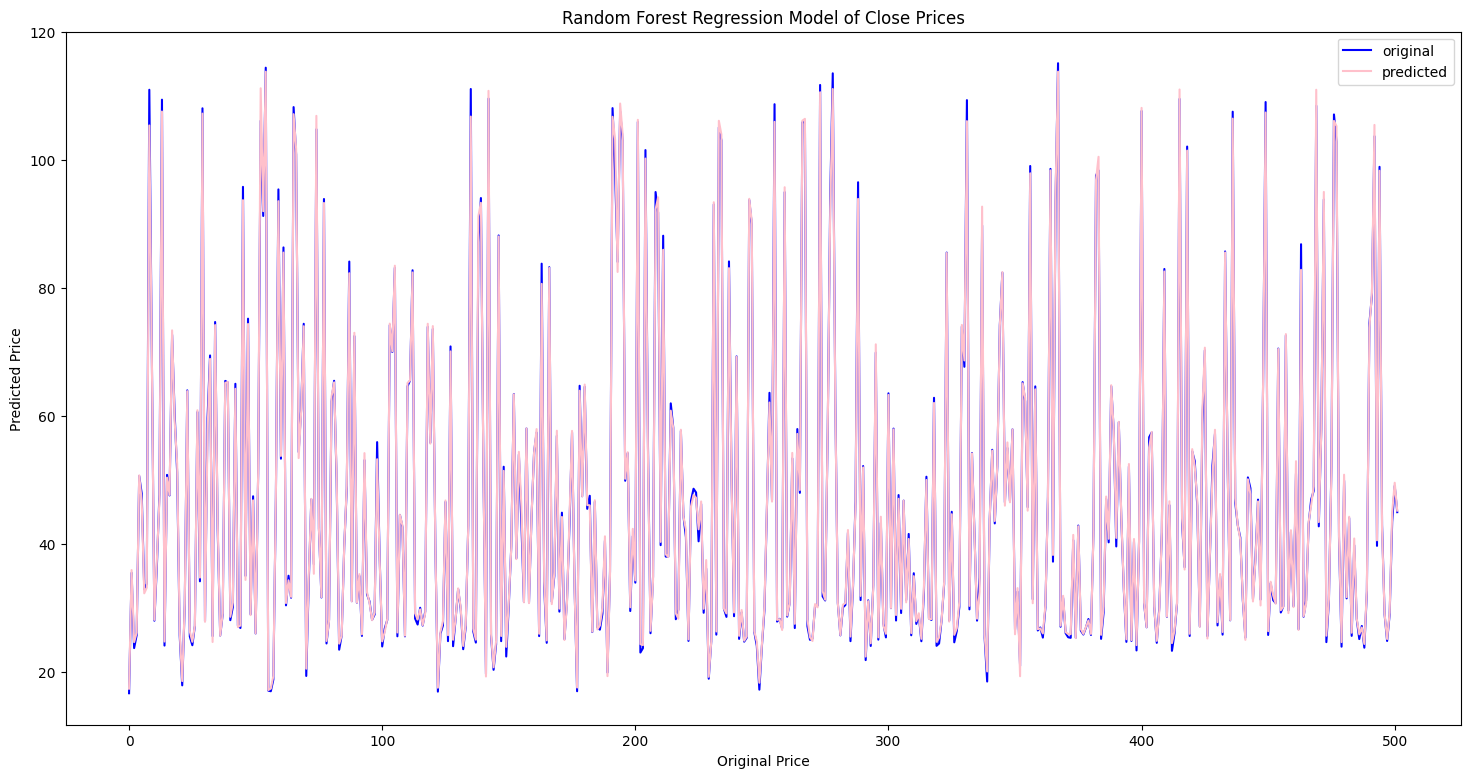

Model Evaluation
Mean Absolute Error: 0.6330464453911241
Root Mean Squared Error: 0.9526255065218804
Mean Absolute Percentage Error: 1.4322773951335577%


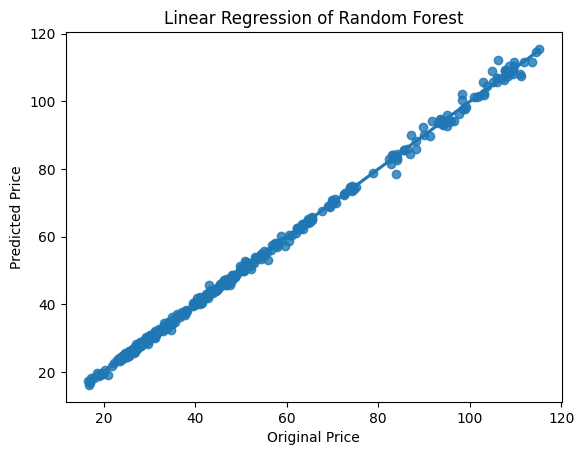

Model Evaluation
Mean Absolute Error: 0.6330464453911241
Root Mean Squared Error: 0.8479015476701979
Mean Absolute Percentage Error: 1.1256694533226594%


In [28]:
fyp_rForest.rand_forest(msft_df['Close'])

### Autoregressive Integrated Moving Average (ARIMA) <a name='arima'></a>

ADF Statistic: -1.239067
p-value: 0.656568


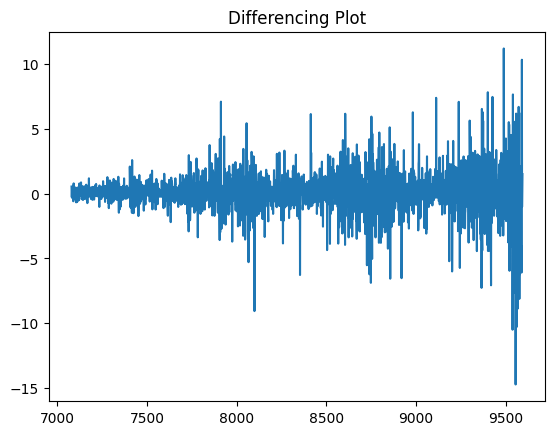

ADF Statistic: -7.662374
p-value: 0.000000


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


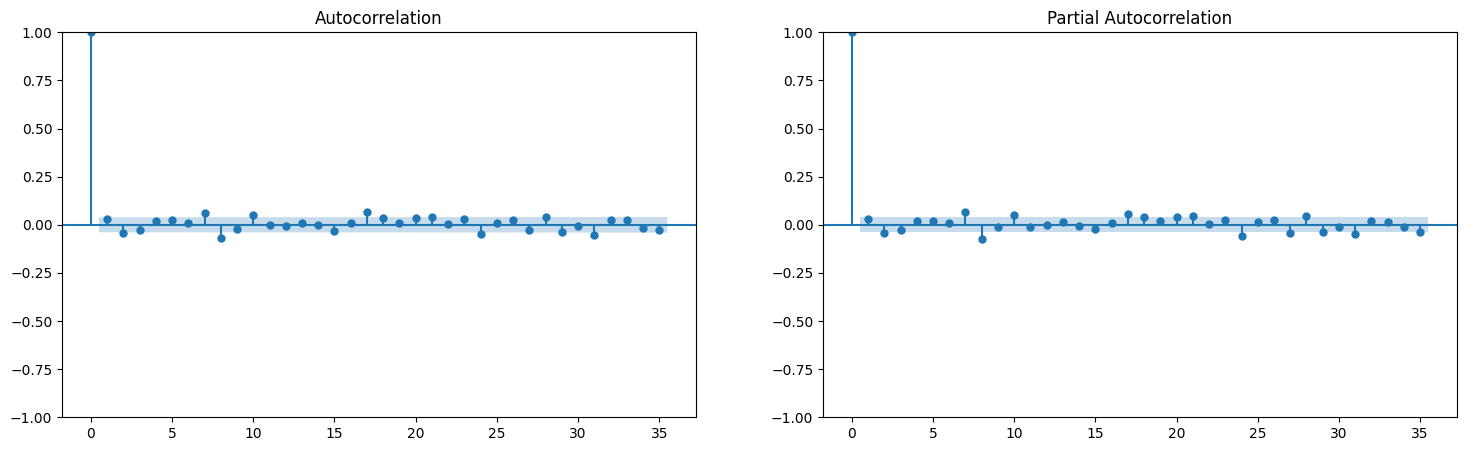

Time Taken:  1 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 124.707
Date:                Sat, 15 Apr 2023   AIC                           -241.414
Time:                        07:41:34   BIC                           -218.987
Sample:                             0   HQIC                          -233.182
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3629      0.006     65.324      0.000       0.352       0.374
ar.L1         -0.5750      0.494     -1.163      0.245      -1.544       0.394
ma.L1          0.5496      0.

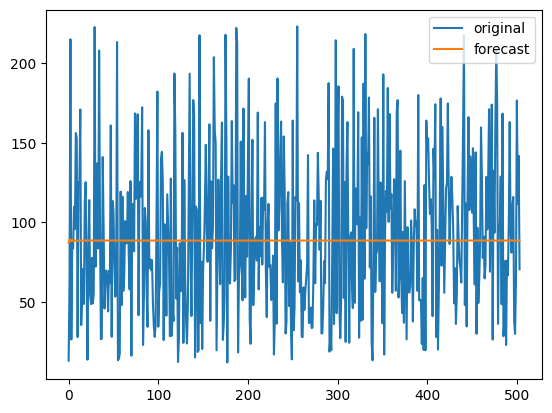

Model Evaluation
Mean Absolute Error: 41.396683077524166
Root Mean Squared Error: 50.41382463372091
Mean Absolute Percentage Error: 74.37512656818642%


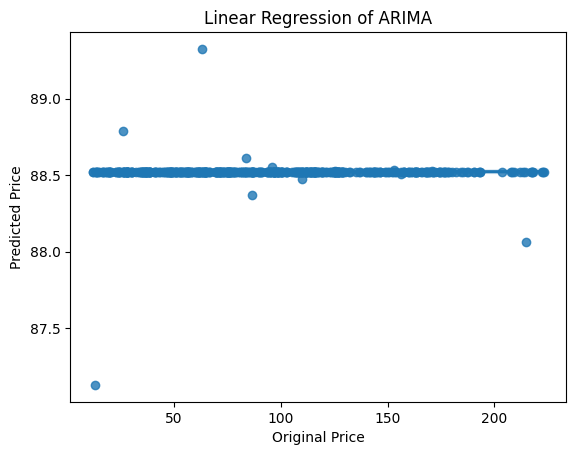

Model Evaluation
Mean Absolute Error: 88.5222208490558
Root Mean Squared Error: 88.52225336902065


In [29]:
fyp_arima.arima(apple_df['Close'])

ADF Statistic: -0.172806
p-value: 0.941686


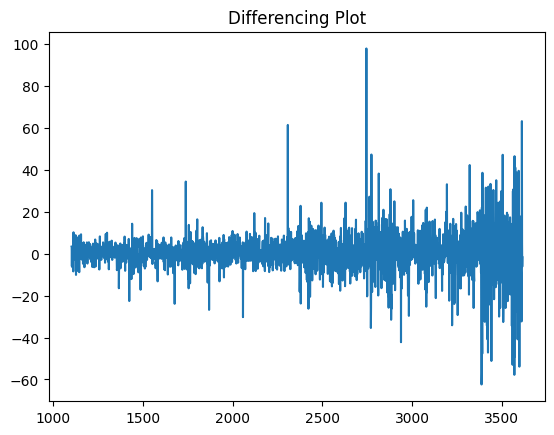

ADF Statistic: -9.378915
p-value: 0.000000


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


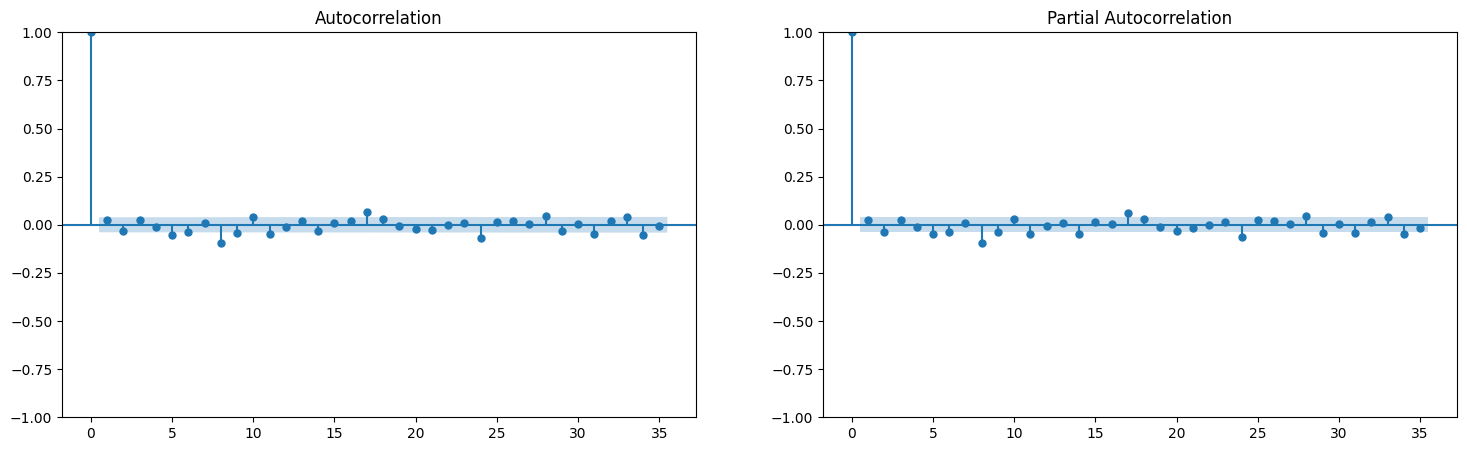

Time Taken:  1 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -136.763
Date:                Sat, 15 Apr 2023   AIC                            281.527
Time:                        07:41:38   BIC                            303.954
Sample:                             0   HQIC                           289.759
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3605      0.007     51.881      0.000       0.347       0.374
ar.L1         -0.5201      0.506     -1.028      0.304      -1.512       0.472
ma.L1          0.4917      0.

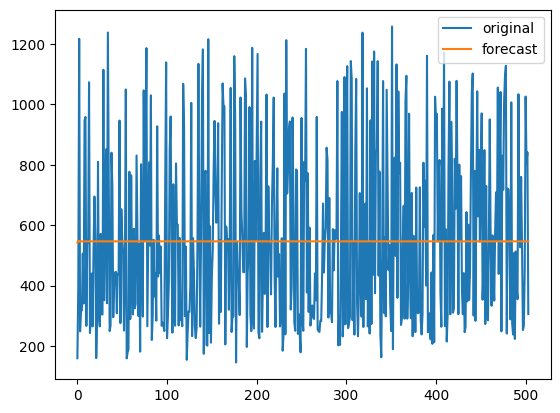

Model Evaluation
Mean Absolute Error: 248.5253214876795
Root Mean Squared Error: 295.3643635189589
Mean Absolute Percentage Error: 58.06869041271454%


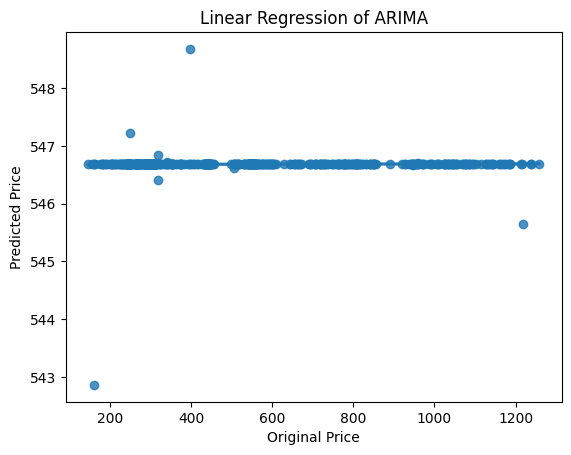

Model Evaluation
Mean Absolute Error: 546.6828843544331
Root Mean Squared Error: 546.68292070554


In [30]:
fyp_arima.arima(google_df['Close'])

ADF Statistic: 1.449094
p-value: 0.997326


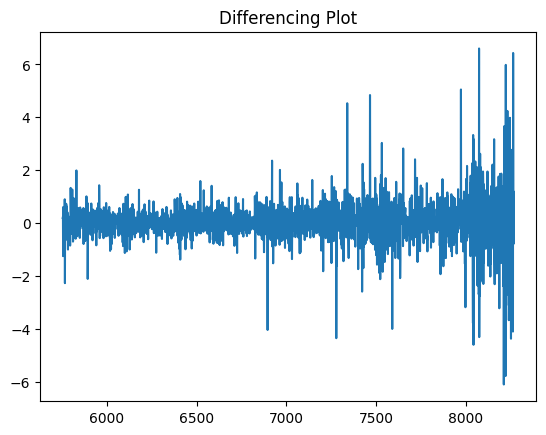

ADF Statistic: -10.828543
p-value: 0.000000


C:\Users\asals\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


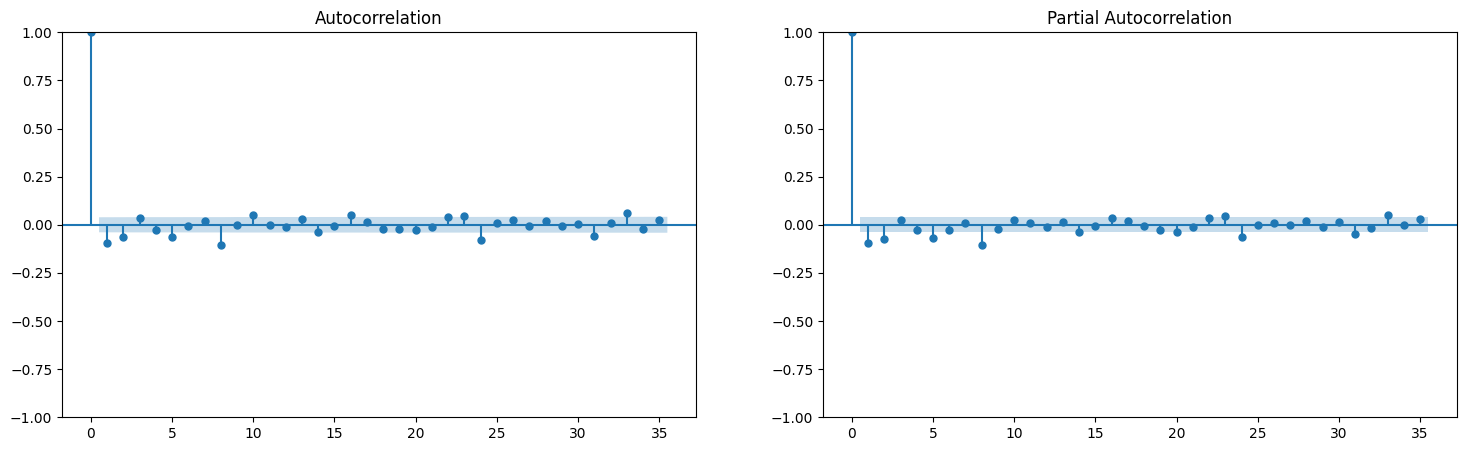

Time Taken:  0 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2012
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  35.298
Date:                Sat, 15 Apr 2023   AIC                            -62.596
Time:                        07:41:41   BIC                            -40.169
Sample:                             0   HQIC                           -54.364
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3009      0.008     37.292      0.000       0.285       0.317
ar.L1         -0.6527      0.412     -1.586      0.113      -1.459       0.154
ma.L1          0.6275      0.

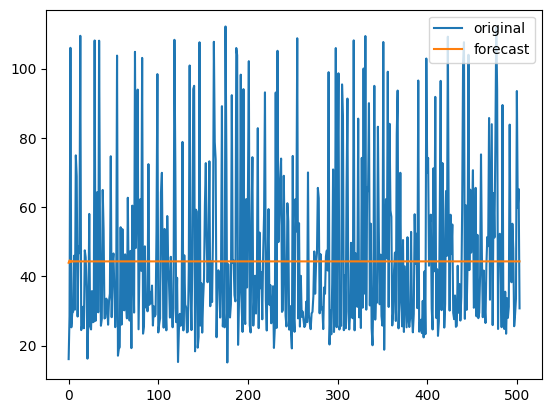

Model Evaluation
Mean Absolute Error: 18.882636023591132
Root Mean Squared Error: 24.17393952717603
Mean Absolute Percentage Error: 45.09716467051555%


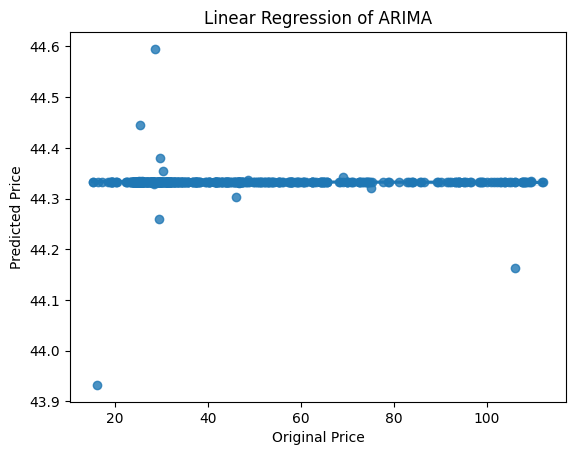

Model Evaluation
Mean Absolute Error: 44.333047185623876
Root Mean Squared Error: 44.33305344819479


In [31]:
fyp_arima.arima(msft_df['Close'])

### Long-Short Term Memory (LSTM) <a name='lstm'></a>

Epoch 1/100
402/402 [==============================] - 7s 7ms/step - loss: 0.0285
Epoch 2/100
402/402 [==============================] - 3s 7ms/step - loss: 5.9588e-04
Epoch 3/100
402/402 [==============================] - 3s 7ms/step - loss: 3.8034e-04
Epoch 4/100
402/402 [==============================] - 3s 7ms/step - loss: 3.3665e-04
Epoch 5/100
402/402 [==============================] - 3s 7ms/step - loss: 3.0337e-04
Epoch 6/100
402/402 [==============================] - 3s 7ms/step - loss: 2.7398e-04
Epoch 7/100
402/402 [==============================] - 3s 7ms/step - loss: 2.5619e-04
Epoch 8/100
402/402 [==============================] - 3s 7ms/step - loss: 2.4531e-04
Epoch 9/100
402/402 [==============================] - 3s 7ms/step - loss: 2.2316e-04
Epoch 10/100
402/402 [==============================] - 3s 7ms/step - loss: 2.0358e-04
Epoch 11/100
402/402 [==============================] - 3s 7ms/step - loss: 1.9271e-04
Epoch 12/100
402/402 [==============================] - 

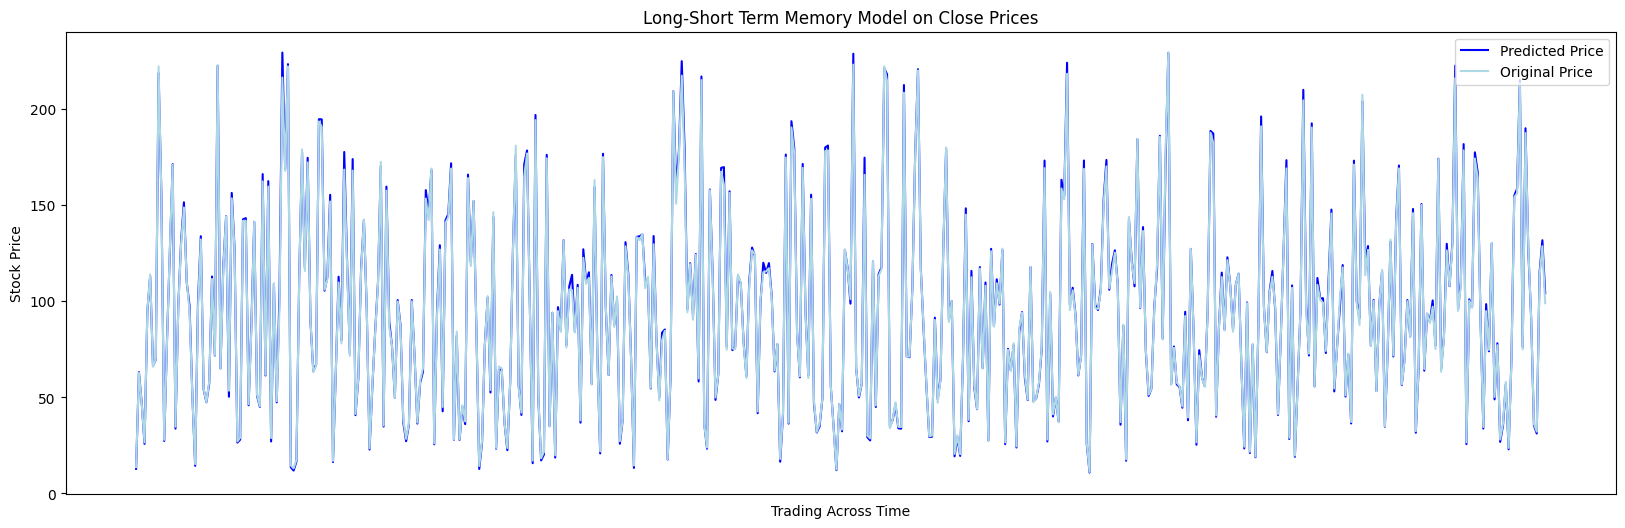

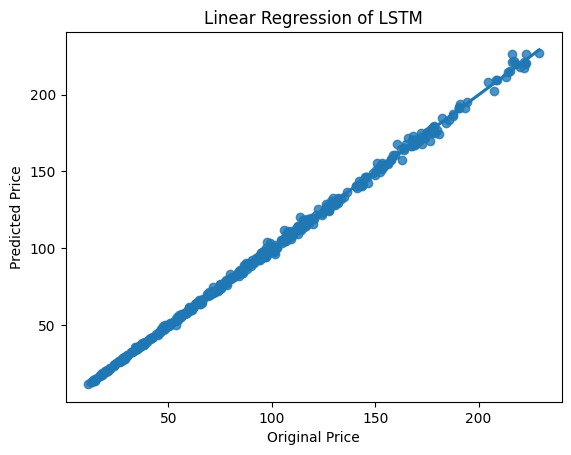

Model Evaluation
Mean Absolute Error: 1.4315380537177465
Root Mean Squared Error: 1.675306384081217
Mean Absolute Percentage Error: 1.2044325927223811%


In [32]:
fyp_lstm.lstm(apple_df['Close'])

Epoch 1/100
402/402 [==============================] - 7s 7ms/step - loss: 0.0256
Epoch 2/100
402/402 [==============================] - 3s 7ms/step - loss: 2.8414e-04
Epoch 3/100
402/402 [==============================] - 3s 7ms/step - loss: 2.5953e-04
Epoch 4/100
402/402 [==============================] - 3s 7ms/step - loss: 2.5193e-04
Epoch 5/100
402/402 [==============================] - 3s 7ms/step - loss: 2.4415e-04
Epoch 6/100
402/402 [==============================] - 3s 7ms/step - loss: 2.3406e-04
Epoch 7/100
402/402 [==============================] - 3s 8ms/step - loss: 2.2933e-04
Epoch 8/100
402/402 [==============================] - 3s 7ms/step - loss: 2.1627e-04
Epoch 9/100
402/402 [==============================] - 3s 7ms/step - loss: 2.1310e-04
Epoch 10/100
402/402 [==============================] - 3s 7ms/step - loss: 2.0571e-04
Epoch 11/100
402/402 [==============================] - 3s 7ms/step - loss: 1.9376e-04
Epoch 12/100
402/402 [==============================] - 

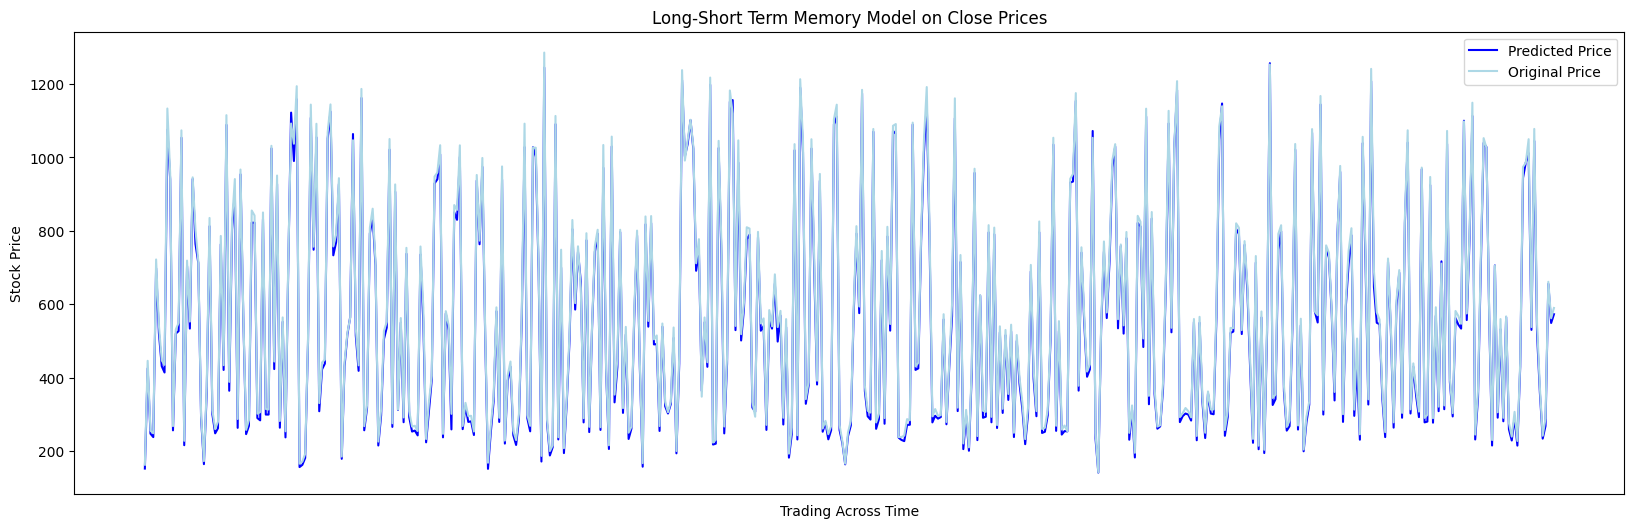

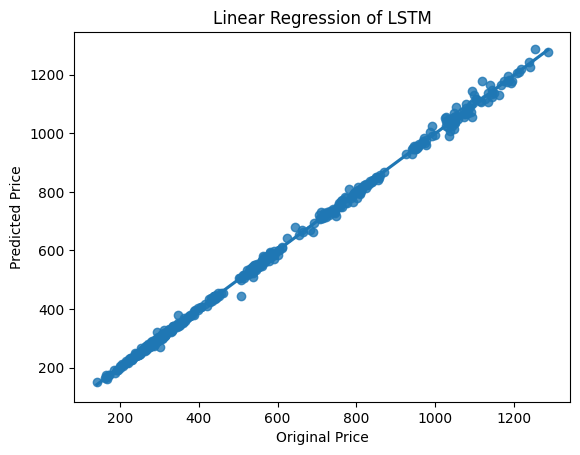

Model Evaluation
Mean Absolute Error: 16.64644662317527
Root Mean Squared Error: 10.24112875027852
Mean Absolute Percentage Error: 1.187032305951233%


In [33]:
fyp_lstm.lstm(google_df['Close'])

Epoch 1/100
402/402 [==============================] - 6s 7ms/step - loss: 0.0033
Epoch 2/100
402/402 [==============================] - 3s 7ms/step - loss: 2.1705e-04
Epoch 3/100
402/402 [==============================] - 3s 7ms/step - loss: 1.5541e-04
Epoch 4/100
402/402 [==============================] - 3s 7ms/step - loss: 1.4642e-04
Epoch 5/100
402/402 [==============================] - 3s 7ms/step - loss: 1.4443e-04
Epoch 6/100
402/402 [==============================] - 3s 7ms/step - loss: 1.4071e-04
Epoch 7/100
402/402 [==============================] - 3s 7ms/step - loss: 1.4094e-04
Epoch 8/100
402/402 [==============================] - 3s 7ms/step - loss: 1.3110e-04
Epoch 9/100
402/402 [==============================] - 3s 7ms/step - loss: 1.2456e-04
Epoch 10/100
402/402 [==============================] - 3s 8ms/step - loss: 1.2627e-04
Epoch 11/100
402/402 [==============================] - 3s 8ms/step - loss: 1.2789e-04
Epoch 12/100
402/402 [==============================] - 

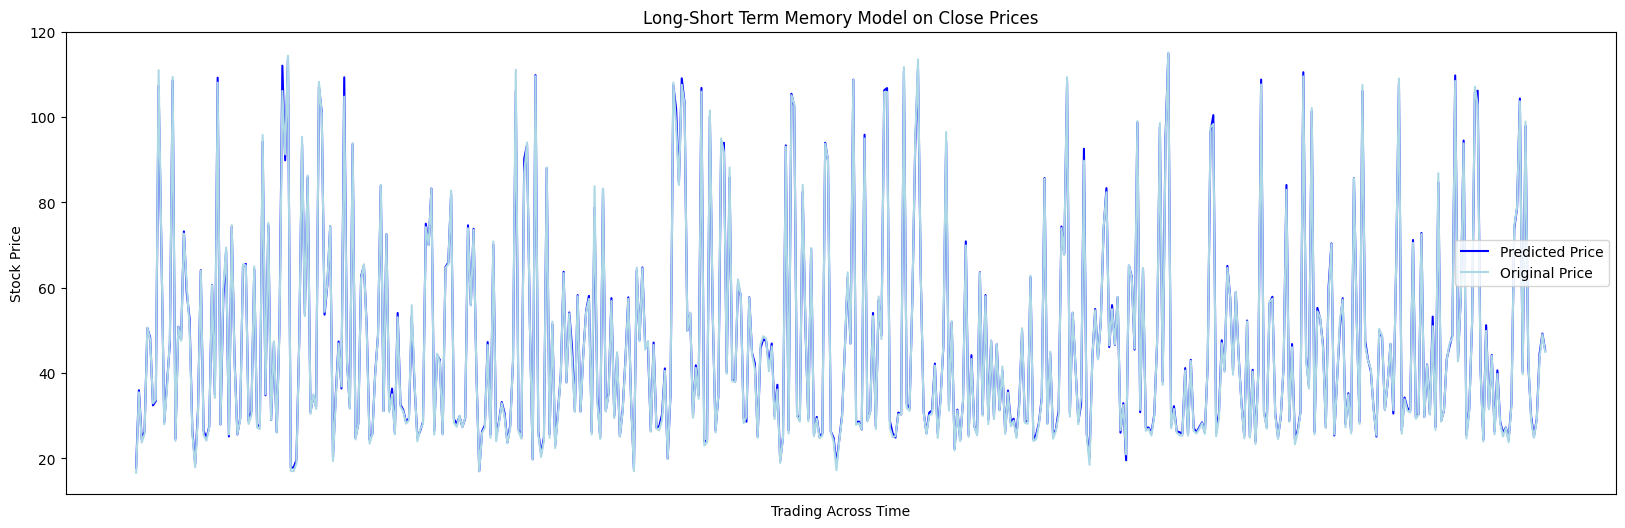

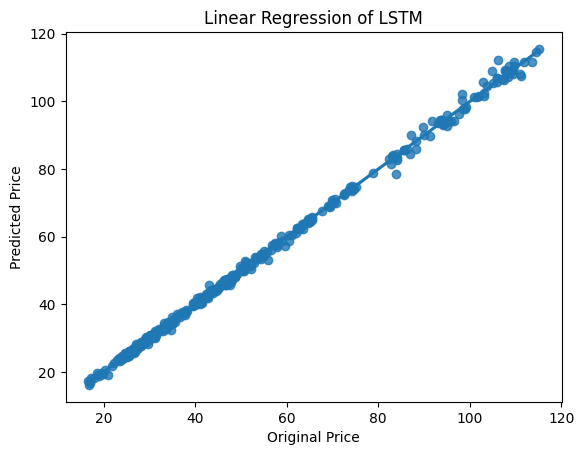

Model Evaluation
Mean Absolute Error: 0.6299984996537288
Root Mean Squared Error: 0.8479015476701979
Mean Absolute Percentage Error: 1.1256694533226594%


In [34]:
fyp_lstm.lstm(msft_df['Close'])

### Convolutional Neural Network (CNN) <a name='cnn'></a>

Epoch 1/100
63/63 [==============================] - 2s 3ms/step - loss: 0.0396 - accuracy: 9.9651e-04
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3888e-04 - accuracy: 9.9651e-04
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 2.2135e-04 - accuracy: 9.9651e-04
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1915e-04 - accuracy: 9.9651e-04
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1895e-04 - accuracy: 9.9651e-04
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1190e-04 - accuracy: 9.9651e-04
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1521e-04 - accuracy: 9.9651e-04
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 2.0278e-04 - accuracy: 9.9651e-04
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1686e-04 - accuracy: 9.9651e-04
Epoch 10/100
63/63 [=====================

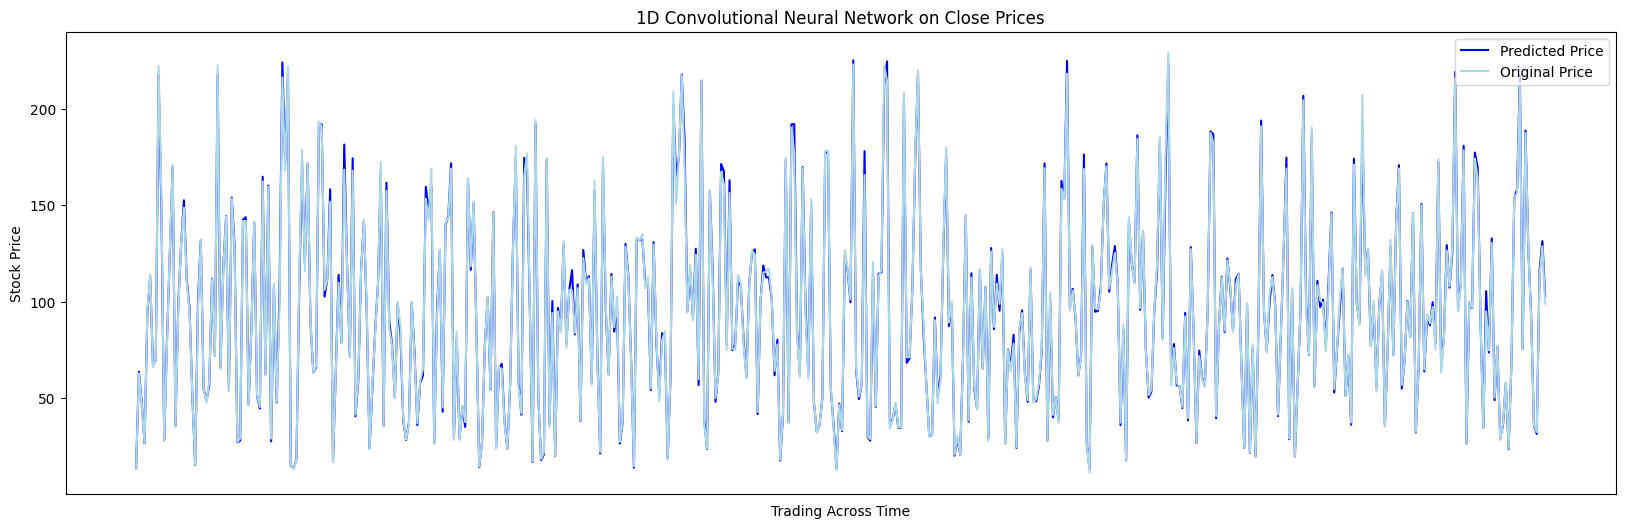

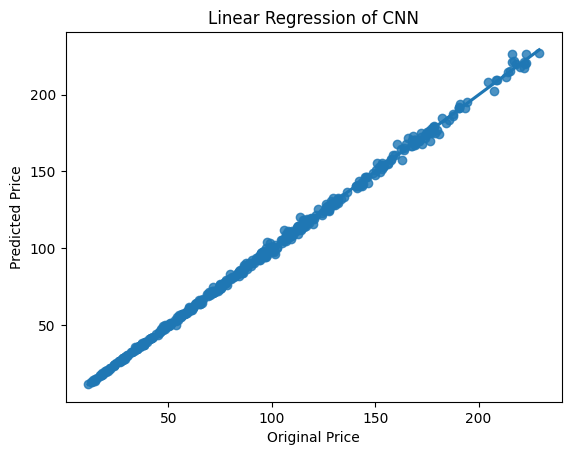

Model Evaluation
Mean Absolute Error: 1.9032586580253692
Root Mean Squared Error: 1.675306384081217
Mean Absolute Percentage Error: 1.2044325927223811%


In [35]:
fyp_cnn.CNN(apple_df['Close'])

Epoch 1/100
63/63 [==============================] - 2s 3ms/step - loss: 0.0341 - accuracy: 9.9651e-04
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 2.5480e-04 - accuracy: 9.9651e-04
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 2.4752e-04 - accuracy: 9.9651e-04
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 2.4368e-04 - accuracy: 9.9651e-04
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 2.4327e-04 - accuracy: 9.9651e-04
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 2.4475e-04 - accuracy: 9.9651e-04
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3515e-04 - accuracy: 9.9651e-04
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3925e-04 - accuracy: 9.9651e-04
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3404e-04 - accuracy: 9.9651e-04
Epoch 10/100
63/63 [=====================

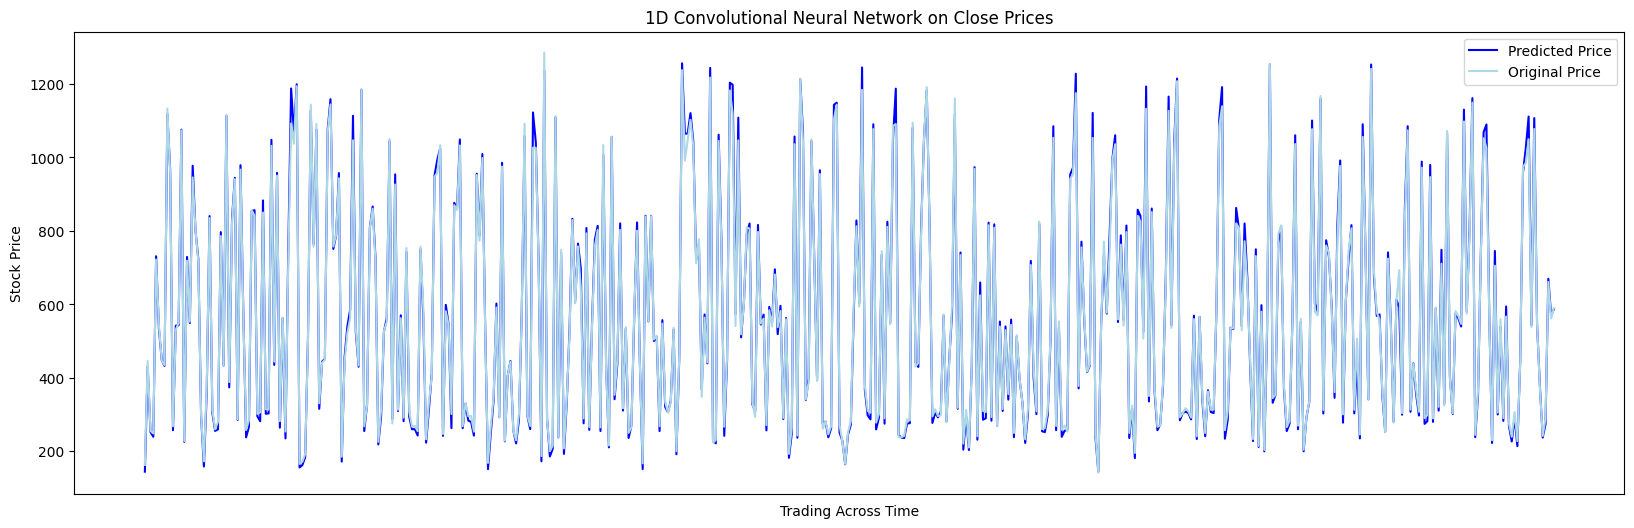

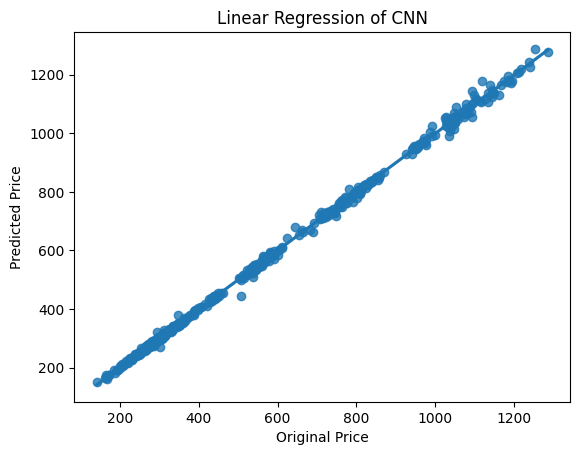

Model Evaluation
Mean Absolute Error: 13.331929879359516
Root Mean Squared Error: 10.24112875027852
Mean Absolute Percentage Error: 1.187032305951233%


In [36]:
fyp_cnn.CNN(google_df['Close'])

Epoch 1/100
63/63 [==============================] - 2s 3ms/step - loss: 0.0209 - accuracy: 9.9651e-04
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 2.2570e-04 - accuracy: 9.9651e-04
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 1.8427e-04 - accuracy: 9.9651e-04
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 1.8296e-04 - accuracy: 9.9651e-04
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 1.8193e-04 - accuracy: 9.9651e-04
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 1.7721e-04 - accuracy: 9.9651e-04
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 1.9713e-04 - accuracy: 9.9651e-04
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 1.8704e-04 - accuracy: 9.9651e-04
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 1.8781e-04 - accuracy: 9.9651e-04
Epoch 10/100
63/63 [=====================

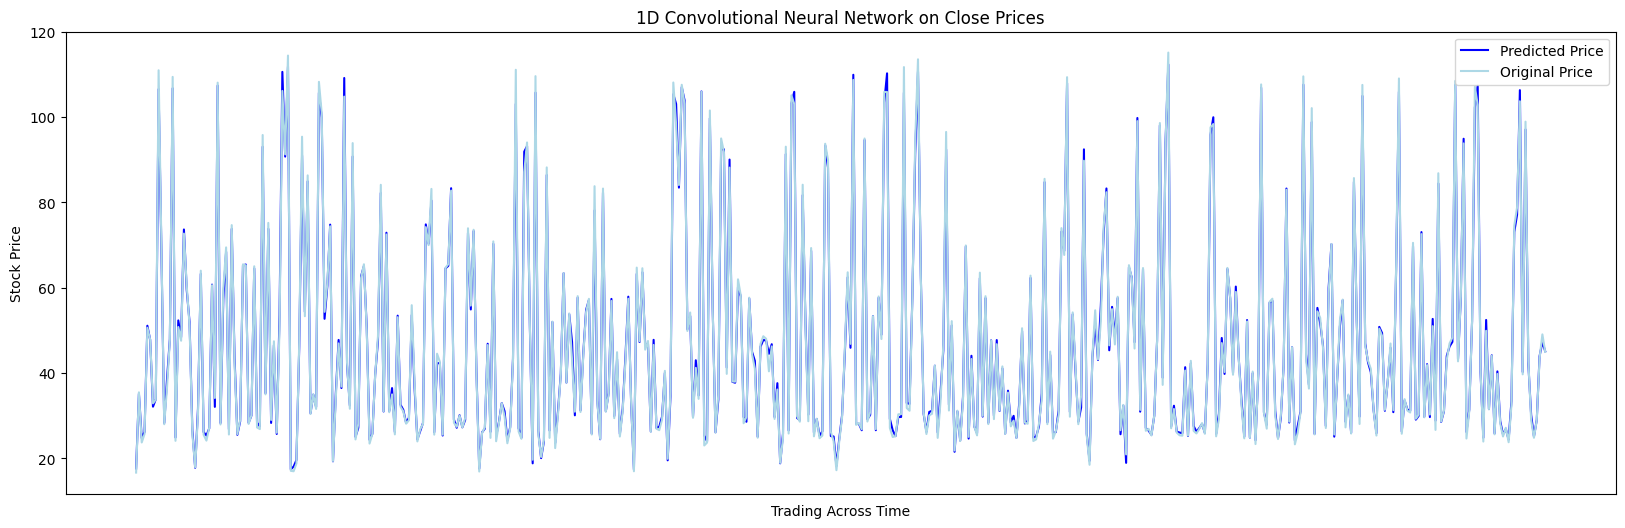

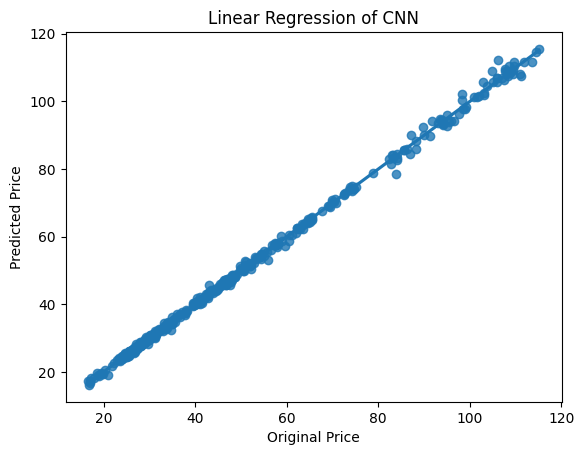

Model Evaluation
Mean Absolute Error: 0.9101144631070445
Root Mean Squared Error: 0.8479015476701979
Mean Absolute Percentage Error: 1.1256694533226594%


In [37]:
fyp_cnn.CNN(msft_df['Close'])

### Joint ML Evaluation <a name='eval'></a>

In [38]:
# plt.plot(fyp_rForest.mae, label = 'random forest')
# plt.plot(fyp_arima.mae, label = 'arima')
# plt.plot(fyp_lstm.mae, label = 'lstm')
# plt.plot(fyp_cnn.mae, label = 'cnn')

# # plt.xlabel()
# # plt.ylabel()
# plt.legend()
# plt.title('Linear Regression Evaluation of ML Models used')
# plt.show()

### Decision Tree Classifier (DTC) <a name='dtc'></a>

1       4
2    1224
0    1288
Name: Decision, dtype: int64
Accuracy Score Percentage: 76.59%
Precision Score Percentage: 76.72%
Recall Score Percentage: 76.7%
F1 Score Percentage: 76.59%


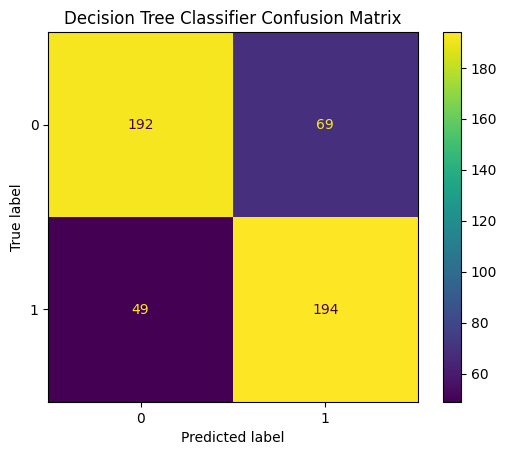

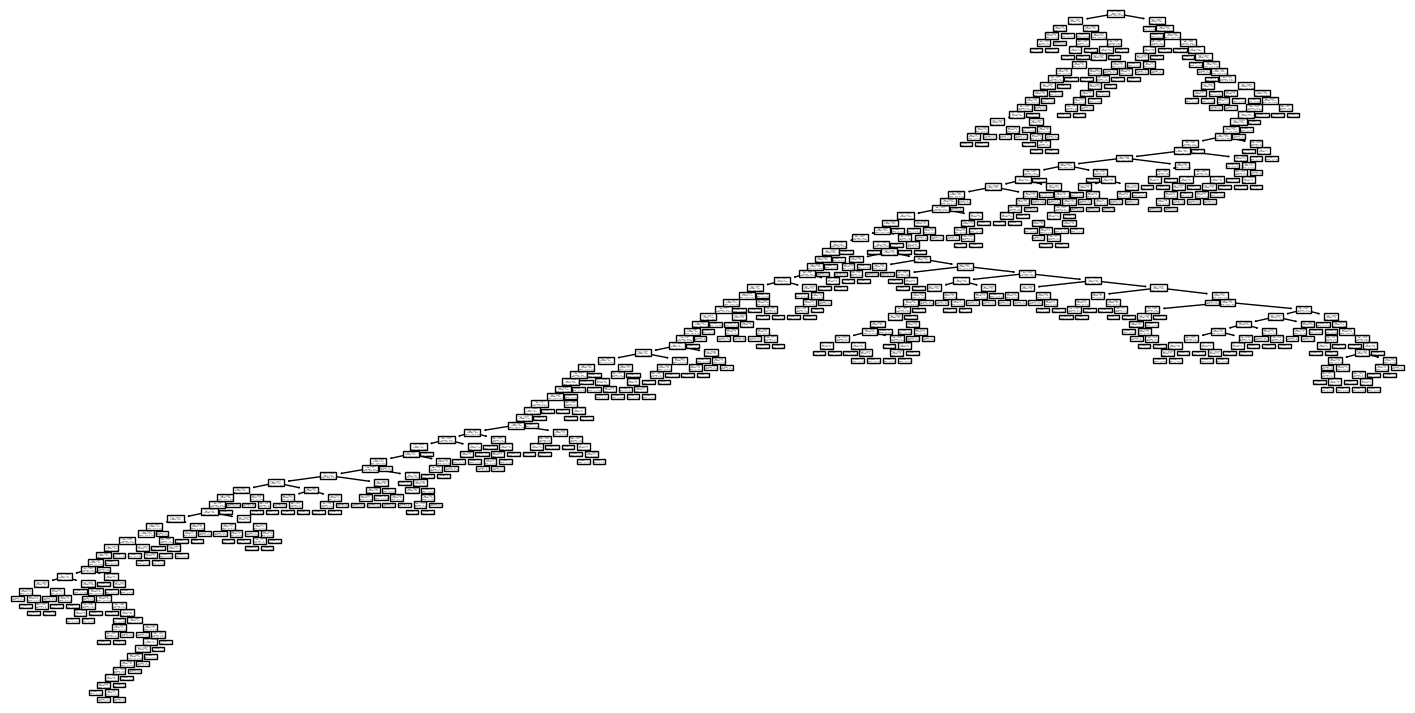

In [39]:
fyp_dtc.dtc(apple_df, 'apple')

1       3
2    1253
0    1260
Name: Decision, dtype: int64
Accuracy Score Percentage: 79.76%
Precision Score Percentage: 79.59%
Recall Score Percentage: 79.59%
F1 Score Percentage: 79.59%


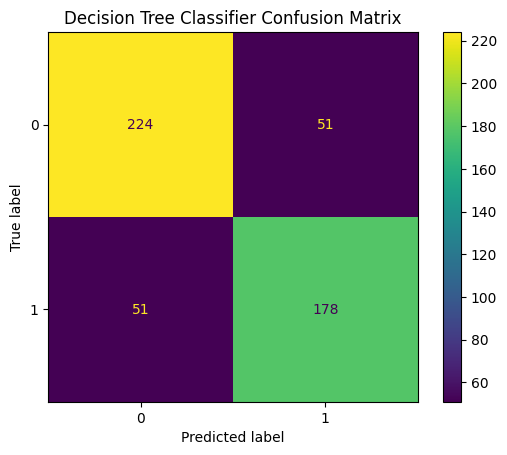

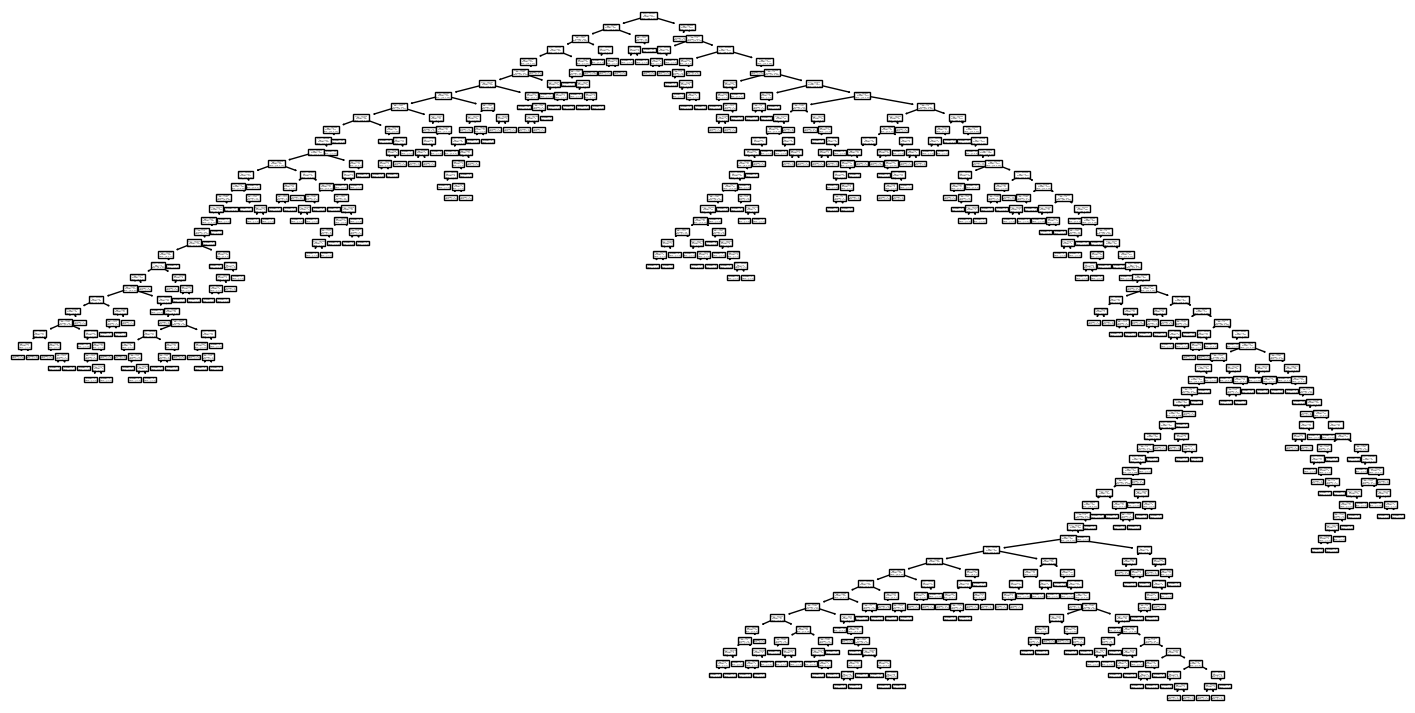

In [40]:
fyp_dtc.dtc(google_df, 'google')

1      35
2    1199
0    1282
Name: Decision, dtype: int64
Accuracy Score Percentage: 78.57%
Precision Score Percentage: 53.56%
Recall Score Percentage: 52.67%
F1 Score Percentage: 53.11%


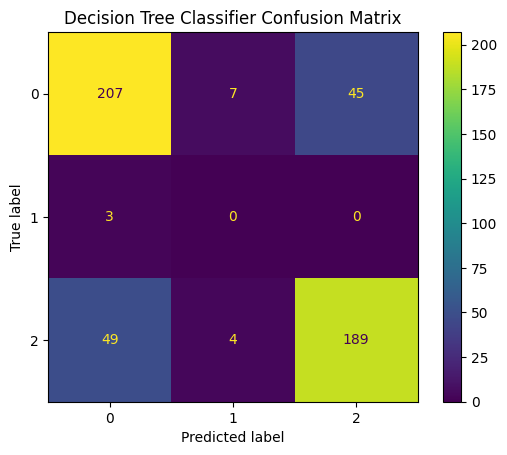

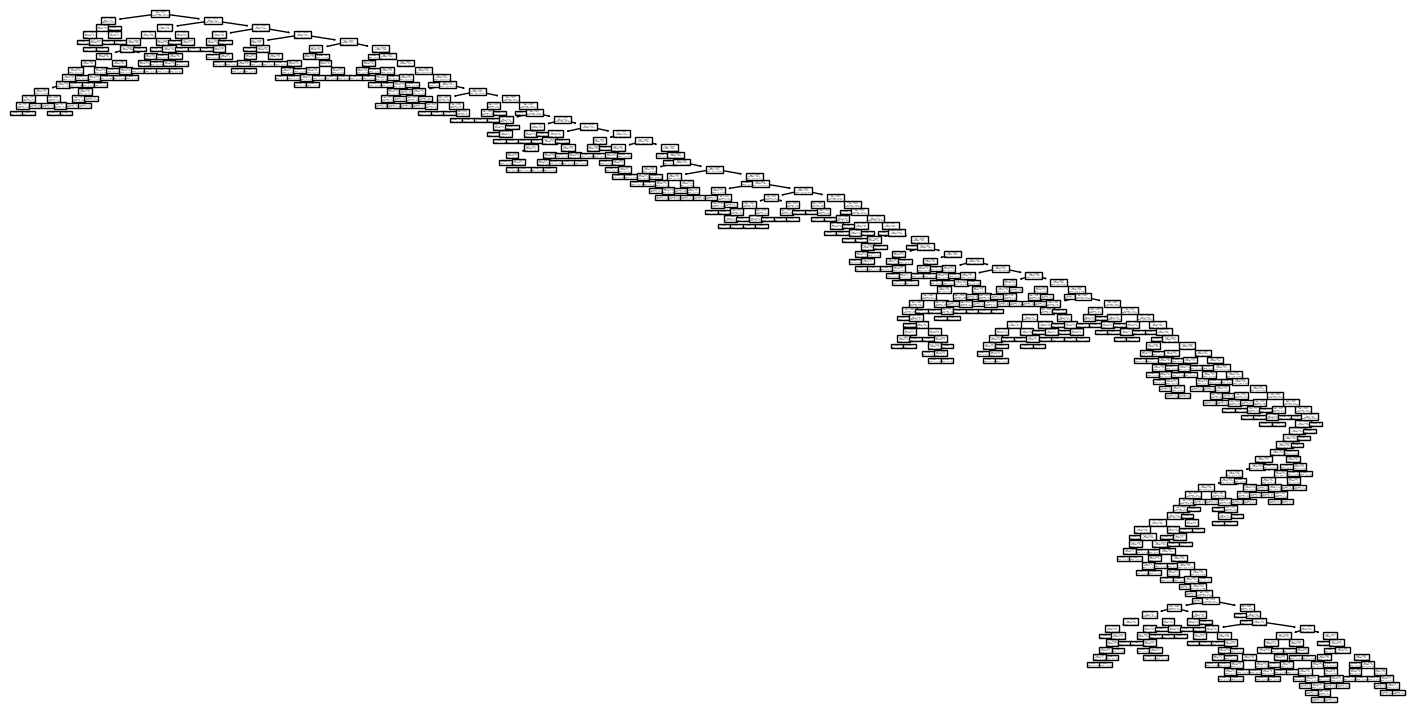

In [41]:
fyp_dtc.dtc(msft_df, 'msft')